In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
data = pd.read_csv('Dataset.csv')
print(data.head())

                        Date        Open        High         Low       Close  \
0  2025-07-03 00:00:00-04:00    6.630000    6.740000    6.615000    6.640000   
1  2025-07-03 00:00:00-04:00  106.750000  108.370003  106.330101  107.339996   
2  2025-07-03 00:00:00-04:00  122.629997  123.050003  121.550003  121.930000   
3  2025-07-03 00:00:00-04:00  221.705002  224.009995  221.360001  223.410004   
4  2025-07-03 00:00:00-04:00  212.145004  214.649994  211.810104  213.550003   

     Volume Brand_Name Ticker Industry_Tag  Country  Dividends  Stock Splits  \
0   4209664    peloton   PTON      fitness      usa        0.0           0.0   
1    560190      crocs   CROX     footwear      usa        0.0           0.0   
2     36600     adidas  ADDYY      apparel  germany        0.0           0.0   
3  29295154     amazon   AMZN   e-commerce      usa        0.0           0.0   
4  34697317      apple   AAPL   technology      usa        0.0           0.0   

   Capital Gains  
0            NaN  


In [3]:
print("\nUnique companies:")
print(data['Brand_Name'].unique())


Unique companies:
['peloton' 'crocs' 'adidas' 'amazon' 'apple' 'nike' 'target' 'google'
 'spotify' 'zoom video communications' 'the walt disney company' 'roblox'
 'delta air lines' 'costco' 'southwest airlines'
 'american eagle outfitters' 'tesla' 'starbucks' 'nvidia'
 'salesforce / slack' 'honda' 'colgate palmolive' 'hershey company'
 'chipotle' 'pinterest' 'logitech' 'shopify' 'amd' 'american express'
 'coinbase' 'mastercard' "mcdonald's" 'adobe' 'unilever' 'cisco'
 'jpmorgan chase & co' 'airbnb' 'marriott' 'toyota' 'hilton'
 'the home depot' 'johnson & johnson' 'uber' 'procter & gamble' 'fedex'
 '3m' 'philips' 'foot locker' 'the coca-cola company' 'microsoft' 'visa'
 'lvmh' 'zoominfo' 'ubisoft' 'netflix' 'puma' 'nintendo' 'bmw group'
 'porsche' 'twitter' 'nordstrom' 'block']


In [4]:
print("\nUnique companies:")
print(data['Country'].unique())


Unique companies:
['usa' 'germany' 'japan' 'switzerland' 'canada' 'netherlands' 'france']


In [5]:
print("\nUnique companies:")
print(data['Ticker'].unique())


Unique companies:
['PTON' 'CROX' 'ADDYY' 'AMZN' 'AAPL' 'NKE' 'TGT' 'GOOGL' 'SPOT' 'ZM' 'DIS'
 'RBLX' 'DAL' 'COST' 'LUV' 'AEO' 'TSLA' 'SBUX' 'NVDA' 'CRM' 'HMC' 'CL'
 'HSY' 'CMG' 'PINS' 'LOGI' 'SHOP' 'AMD' 'AXP' 'COIN' 'MA' 'MCD' 'ADBE'
 'UL' 'CSCO' 'JPM' 'ABNB' 'MAR' 'TM' 'HLT' 'HD' 'JNJ' 'UBER' 'PG' 'FDX'
 'MMM' 'PHG' 'FL' 'KO' 'MSFT' 'V' 'LVMUY' 'ZI' 'UBSFY' 'NFLX' 'PMMAF'
 'NTDOY' 'BAMXF' 'POAHY' 'TWTR' 'JWN' 'SQ']


In [8]:
print(data['Brand_Name'].nunique())
print(data['Ticker'].nunique())

62
62


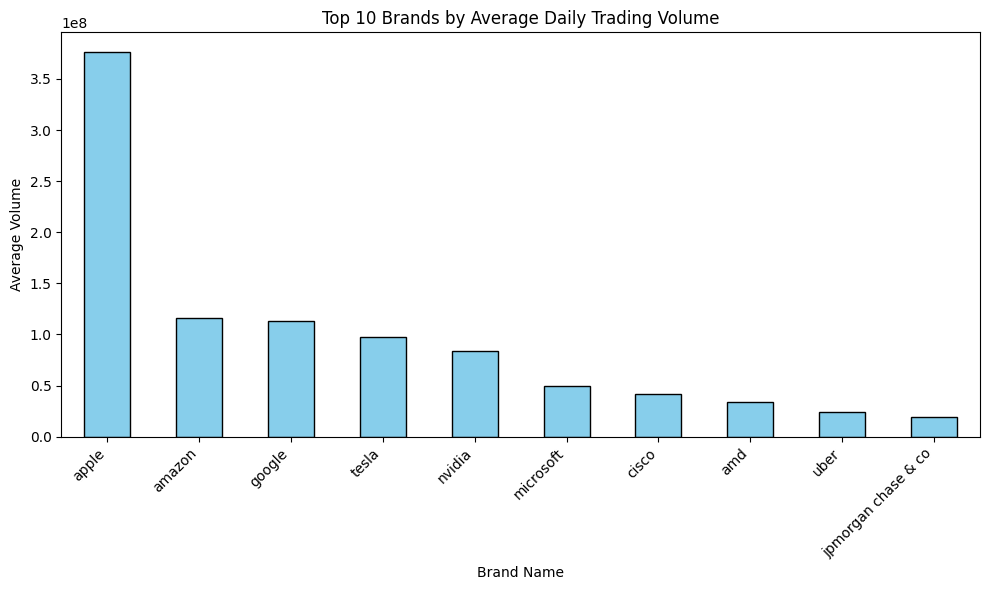

In [10]:
volume_df = data.groupby('Brand_Name')['Volume'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
volume_df.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Brands by Average Daily Trading Volume')
plt.ylabel('Average Volume')
plt.xlabel('Brand Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(60, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Filter Apple stock (AAPL)
apple_data = data[data['Ticker'] == 'AAPL'].copy()

# Convert Date to datetime and sort
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data = apple_data.sort_values('Date')

# Use only the 'Close' price for prediction
close_prices = apple_data[['Close']].values

# Normalize data (scale between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_prices)

# Create sequences (60 days -> next day)
time_steps = 60
X, y = [], []
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i, 0])  # past 60 days
    y.append(scaled_data[i, 0])               # next day
X, y = np.array(X), np.array(y)

# Reshape X for LSTM: (samples, time_steps, features=1)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

X.shape, y.shape

C:\Users\me\AppData\Local\Temp\ipykernel_4700\937549235.py:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  apple_data['Date'] = pd.to_datetime(apple_data['Date'])


((6410, 60, 1), (6410,))

C:\Users\me\AppData\Local\Temp\ipykernel_4700\3200627708.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  apple_data['Date'] = pd.to_datetime(apple_data['Date'])
c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 2.2669e-04 - val_loss: 5.0945e-04
Epoch 2/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 3.3110e-05 - val_loss: 2.7103e-04
Epoch 3/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 2.9187e-05 - val_loss: 2.2302e-04
Epoch 4/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - loss: 2.3772e-05 - val_loss: 1.5685e-04
Epoch 5/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 2.2576e-05 - val_loss: 1.3261e-04
Epoch 6/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 2.2230e-05 - val_loss: 1.5939e-04
Epoch 7/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 2.3037e-05 - val_loss: 1.7276e-04
Epoch 8/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 1.9248e-05 - val_loss: 1.1188e-04
Epoch 9/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - loss: 1.9463e-05 - val_loss: 1.3711e-04
Epoch 10/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 1.9593e-05 - val_loss: 1.2216e-04
Epoch 11/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 9s 

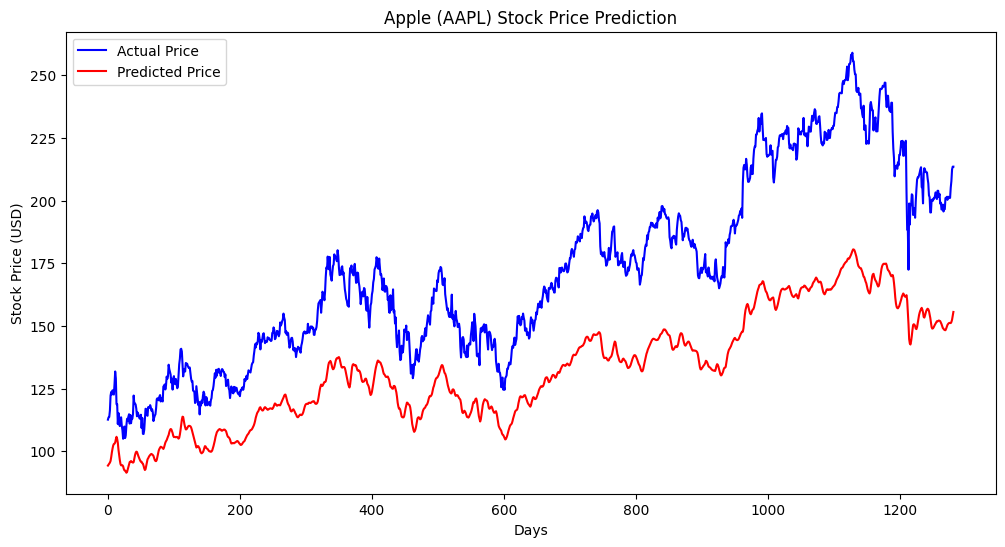

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# =====================
# 1. Load & preprocess
# =====================
df = pd.read_csv("Dataset.csv")

# Filter Apple stock (AAPL)
apple_data = df[df['Ticker'] == 'AAPL'].copy()

# Convert Date to datetime and sort
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data = apple_data.sort_values('Date')

# Use only the 'Close' price
close_prices = apple_data[['Close']].values

# Normalize between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_prices)

# =====================
# 2. Create sequences
# =====================
time_steps = 60
X, y = [], []
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i, 0])  # past 60 days
    y.append(scaled_data[i, 0])               # next day
X, y = np.array(X), np.array(y)

# Reshape for LSTM (samples, time_steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# =====================
# 3. Train-Test Split
# =====================
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# =====================
# 4. Build LSTM Model
# =====================
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')

# =====================
# 5. Train Model
# =====================
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=50, 
                    validation_split=0.1, 
                    verbose=1)

# =====================
# 6. Predictions
# =====================
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))

# Inverse scaling for actual values
actual = scaler.inverse_transform(y_test.reshape(-1,1))

# =====================
# 7. Visualization
# =====================
plt.figure(figsize=(12,6))
plt.plot(actual, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title("Apple (AAPL) Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

C:\Users\me\AppData\Local\Temp\ipykernel_23148\1041243440.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  amazon_data['Date'] = pd.to_datetime(amazon_data['Date'])
c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 4.3512e-04 - val_loss: 4.7041e-04
Epoch 2/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 7.4789e-05 - val_loss: 0.0016
Epoch 3/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 7.0094e-05 - val_loss: 0.0013
Epoch 4/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 7.3018e-05 - val_loss: 3.8322e-04
Epoch 5/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 5.5581e-05 - val_loss: 0.0031
Epoch 6/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 8.5665e-05 - val_loss: 4.2852e-04
Epoch 7/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 5.7337e-05 - val_loss: 5.5529e-04
Epoch 8/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 5.5903e-05 - val_loss: 3.9220e-04
Epoch 9/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 5.3729e-05 - val_loss: 0.0011
Epoch 10/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 5.6291e-05 - val_loss: 7.6501e-04
Epoch 11/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 5.7

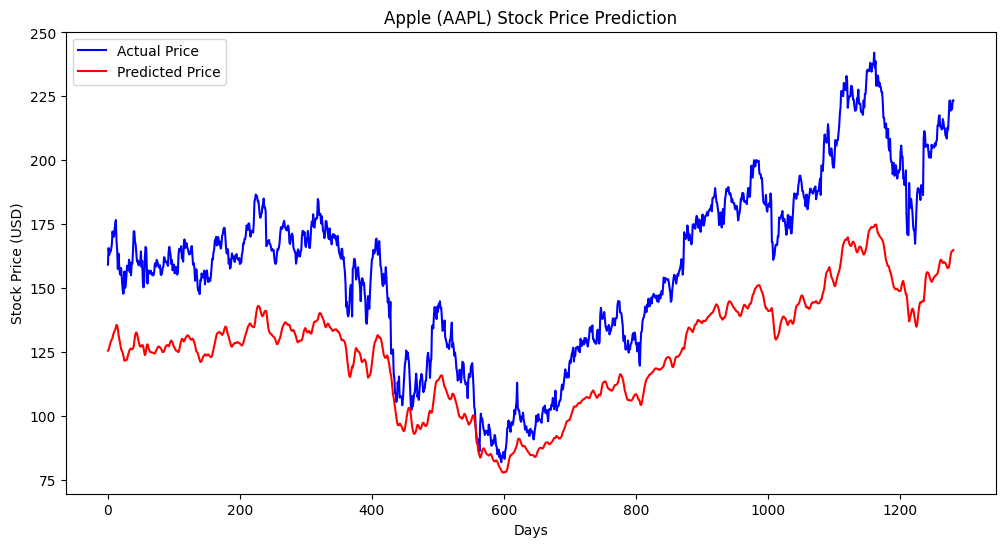

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# =====================
# 1. Load & preprocess
# =====================
df = pd.read_csv("Dataset.csv")

# Filter Amazon stock (AMZN)
amazon_data = df[df['Ticker'] == 'AMZN'].copy()

# Convert Date to datetime and sort
amazon_data['Date'] = pd.to_datetime(amazon_data['Date'])
amazon_data = amazon_data.sort_values('Date')

# Use only the 'Close' price
close_prices = amazon_data[['Close']].values

# Normalize between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_prices)

# =====================
# 2. Create sequences
# =====================
time_steps = 60
X, y = [], []
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i, 0])  # past 60 days
    y.append(scaled_data[i, 0])               # next day
X, y = np.array(X), np.array(y)

# Reshape for LSTM (samples, time_steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# =====================
# 3. Train-Test Split
# =====================
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# =====================
# 4. Build LSTM Model
# =====================
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')

# =====================
# 5. Train Model
# =====================
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=50, 
                    validation_split=0.1, 
                    verbose=1)

# =====================
# 6. Predictions
# =====================
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))

# Inverse scaling for actual values
actual = scaler.inverse_transform(y_test.reshape(-1,1))

# =====================
# 7. Visualization
# =====================
plt.figure(figsize=(12,6))
plt.plot(actual, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title("Apple (AAPL) Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

In [2]:
apple_data = df[df['Ticker'] == 'AAPL'].copy()
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data = apple_data.sort_values('Date')
print("Date range used for LSTM:")
print("From:", apple_data['Date'].min())
print("To:", apple_data['Date'].max())

Date range used for LSTM:
From: 2000-01-03 00:00:00-05:00
To: 2025-07-03 00:00:00-04:00


C:\Users\me\AppData\Local\Temp\ipykernel_23148\786020181.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  apple_data['Date'] = pd.to_datetime(apple_data['Date'])


In [4]:
import pandas as pd

# Define start and end dates
start_date = pd.to_datetime('01/03/2000')
end_date = pd.to_datetime('07/03/2025')

# Calculate the total number of days between the two dates
total_days = (end_date - start_date).days

# Calculate the 80% point in terms of days
train_days = total_days * 0.8

# Find the date at the 80% mark
train_end_date = start_date + pd.Timedelta(days=train_days)

# Print the result
print("The date at the 80% mark is:", train_end_date.strftime('%m/%d/%Y'))

The date at the 80% mark is: 05/27/2020


C:\Users\me\AppData\Local\Temp\ipykernel_23148\1928397342.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  amazon_data['Date'] = pd.to_datetime(amazon_data['Date'])
c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 8.0613e-04 - val_loss: 0.0025
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 2.1063e-04 - val_loss: 0.0011
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 1.6414e-04 - val_loss: 0.0039
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 1.5371e-04 - val_loss: 0.0015
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 1.5143e-04 - val_loss: 0.0022
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 1.3150e-04 - val_loss: 0.0012
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 1.1239e-04 - val_loss: 0.0018
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 1.5641e-04 - val_loss: 0.0018
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 1.0753e-04 - val_loss: 7.7590e-04
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 9.3788e-05 - val_loss: 0.0018
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 1.1425e-04 - val_loss:

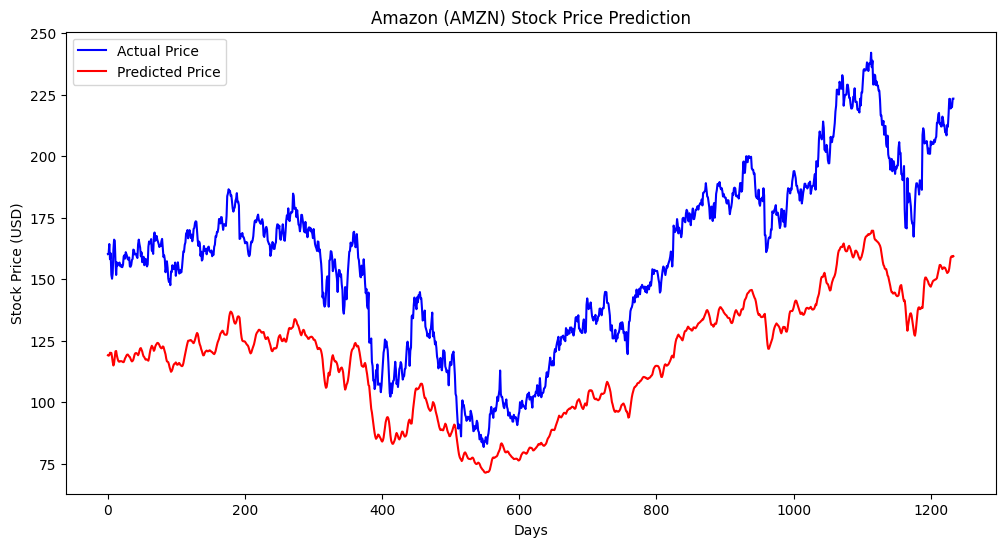

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# =====================
# 1. Load & preprocess
# =====================
df = pd.read_csv("Dataset.csv")

# Filter Amazon stock (AMZN)
amazon_data = df[df['Ticker'] == 'AMZN'].copy()

# Convert Date to datetime and sort
amazon_data['Date'] = pd.to_datetime(amazon_data['Date'])
amazon_data = amazon_data.sort_values('Date')

# Use only the 'Close' price
close_prices = amazon_data[['Close']].values

# =====================
# 2. Train-Test Split (before scaling)
# =====================
train_size = int(len(close_prices) * 0.8)
train_prices = close_prices[:train_size]
test_prices = close_prices[train_size:]

# =====================
# 3. Scaling
# =====================
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train_prices)
test_scaled = scaler.transform(test_prices)

# =====================
# 4. Create sequences function
# =====================
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X_train, y_train = create_sequences(train_scaled, time_steps)
X_test, y_test = create_sequences(test_scaled, time_steps)

# Reshape input for LSTM: (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# =====================
# 5. Build LSTM Model
# =====================
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')

# =====================
# 6. Train Model
# =====================
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_split=0.1,
                    verbose=1)

# =====================
# 7. Predictions
# =====================
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

actual = scaler.inverse_transform(y_test.reshape(-1,1))

# =====================
# 8. Visualization
# =====================
plt.figure(figsize=(12,6))
plt.plot(actual, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title("Amazon (AMZN) Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

C:\Users\me\AppData\Local\Temp\ipykernel_17608\3157713515.py:25: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  apple_data['Date'] = pd.to_datetime(apple_data['Date'])
c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 2/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 9.6237e-05 - val_loss: 0.0014
Epoch 3/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 1.0470e-04 - val_loss: 0.0028
Epoch 4/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 8.6884e-05 - val_loss: 0.0011
Epoch 5/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 8.4414e-05 - val_loss: 0.0014
Epoch 6/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 9.1345e-05 - val_loss: 0.0012
Epoch 7/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 6.8636e-05 - val_loss: 8.7194e-04
Epoch 8/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 6.6820e-05 - val_loss: 0.0023
Epoch 9/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 7.6873e-05 - val_loss: 0.0014
Epoch 10/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 6.3694e-05 - val_loss: 0.0013
Epoch 11/150
145/145 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 7.7866e-05 - va

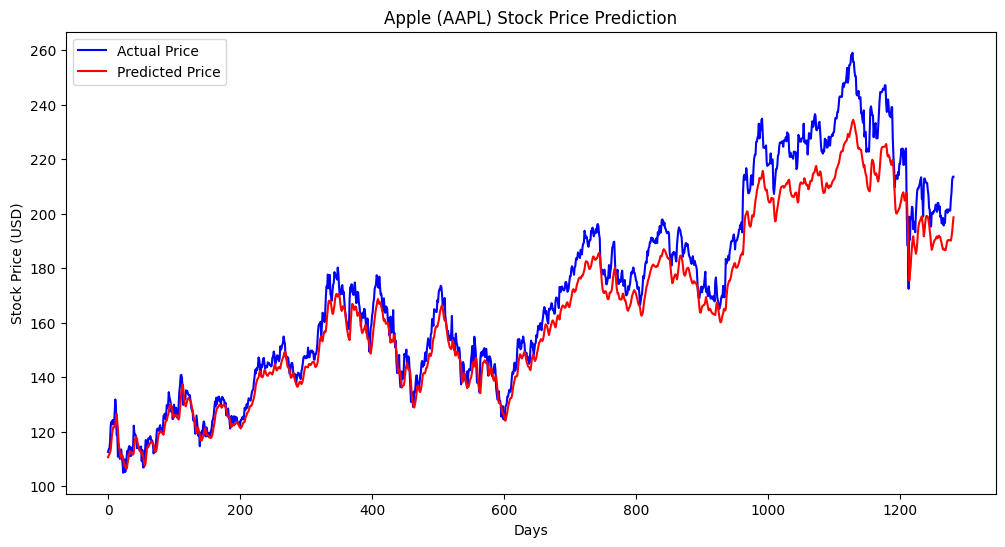

Training Close Price Range: 0.198861182 to 96.43733215
Testing  Close Price Range: 94.31214905 to 259.019989


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load & preprocess
df = pd.read_csv("Dataset.csv")

# Filter Apple stock (AAPL)
apple_data = df[df['Ticker'] == 'AAPL'].copy()

# Convert Date to datetime and sort
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data = apple_data.sort_values('Date')

# Use only the 'Close' price
close_prices = apple_data[['Close']].values

# Train-Test Split
train_size = int(len(close_prices) * 0.8)
train_data = close_prices[:train_size]
test_data = close_prices[train_size:]

# Fit scaler ONLY on training data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(train_data)
scaled_all = scaler.transform(close_prices)

# Create sequences
time_steps = 60
X, y = [], []
for i in range(time_steps, len(scaled_all)):
    X.append(scaled_all[i-time_steps:i, 0])  # past 60 days
    y.append(scaled_all[i, 0])               # next day
X, y = np.array(X), np.array(y)

# Reshape for LSTM (samples, time_steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split again (same ratio)
train_len = int(len(X) * 0.8)
X_train, X_test = X[:train_len], X[train_len:]
y_train, y_test = y[:train_len], y[train_len:]

# Build LSTM Model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.1),
    LSTM(100, return_sequences=False),
    Dropout(0.1),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train Model
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=150,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # inverse scale

# Inverse scaling for actual values
actual = scaler.inverse_transform(y_test.reshape(-1,1))

# Evaluation
rmse = np.sqrt(mean_squared_error(actual, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualization
plt.figure(figsize=(12,6))
plt.plot(actual, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title("Apple (AAPL) Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

# Optional: Compare Ranges
print("Training Close Price Range:", train_data.min(), "to", train_data.max())
print("Testing  Close Price Range:", test_data.min(), "to", test_data.max())

Training period: 2000-01-03 00:00:00-05:00 to 2020-07-29 00:00:00-04:00
Testing period:  2020-07-30 00:00:00-04:00 to 2025-07-03 00:00:00-04:00
Epoch 1/150


C:\Users\me\AppData\Local\Temp\ipykernel_17608\2373594354.py:22: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  apple_data['Date'] = pd.to_datetime(apple_data['Date'])
c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


144/144 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - loss: 7.8006e-04 - val_loss: 0.0013
Epoch 2/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - loss: 1.0852e-04 - val_loss: 0.0038
Epoch 3/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - loss: 1.0529e-04 - val_loss: 0.0018
Epoch 4/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - loss: 9.3837e-05 - val_loss: 7.9877e-04
Epoch 5/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 20s 139ms/step - loss: 7.4085e-05 - val_loss: 8.4450e-04
Epoch 6/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step - loss: 9.7395e-05 - val_loss: 9.8598e-04
Epoch 7/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - loss: 7.1423e-05 - val_loss: 5.2759e-04
Epoch 8/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 22s 152ms/step - loss: 6.2456e-05 - val_loss: 6.0847e-04
Epoch 9/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 20s 137ms/step - loss: 6.0986e-05 - val_loss: 9.7333e-04
Epoch 10/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - loss: 7.5444e-05 - val_loss: 0.0012
Epoch 11/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 15s 100

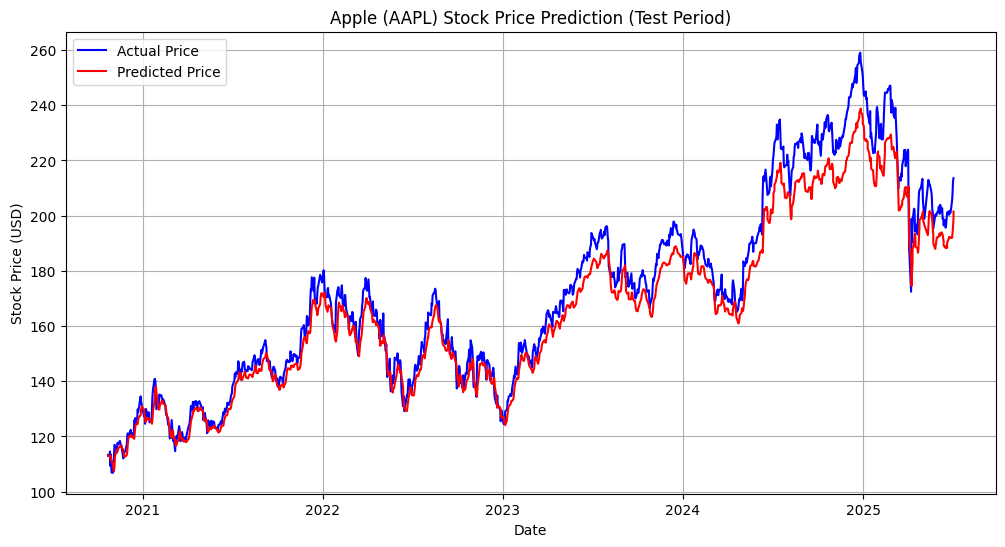

Training Close Price Range: 0.198861182 to 96.43733215
Testing  Close Price Range: 94.31214905 to 259.019989


In [9]:
# ==========================
# LSTM Stock Price Prediction (Fixed Version)
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==========================
# 1. Load & preprocess
# ==========================
df = pd.read_csv("Dataset.csv")

# Filter for Apple stock (AAPL)
apple_data = df[df['Ticker'] == 'AAPL'].copy()

# Convert Date to datetime and sort
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data = apple_data.sort_values('Date')

# Use only 'Close' price
close_prices = apple_data[['Close']].values

# ==========================
# 2. Train-Test Split (by time)
# ==========================
train_size = int(len(close_prices) * 0.8)
train_data = close_prices[:train_size]
test_data = close_prices[train_size:]

# Print date ranges for clarity
print("Training period:", apple_data['Date'].iloc[0], "to", apple_data['Date'].iloc[train_size-1])
print("Testing period: ", apple_data['Date'].iloc[train_size], "to", apple_data['Date'].iloc[-1])

# ==========================
# 3. Scaling
# ==========================
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(train_data)
scaled_test = scaler.transform(test_data)

# ==========================
# 4. Create sequences separately for train & test
# ==========================
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X_train, y_train = create_sequences(scaled_train, time_steps)
X_test, y_test = create_sequences(scaled_test, time_steps)

# Reshape for LSTM (samples, time_steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test,  (X_test.shape[0],  X_test.shape[1],  1))

# ==========================
# 5. Build the LSTM Model
# ==========================
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.1),
    LSTM(100, return_sequences=False),
    Dropout(0.1),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ==========================
# 6. Train Model
# ==========================
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=150,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# ==========================
# 7. Make Predictions
# ==========================
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1,1))

# ==========================
# 8. Evaluation
# ==========================
rmse = np.sqrt(mean_squared_error(actual, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# ==========================
# 9. Visualization
# ==========================
# Align test dates to sequence output (skip first 60 days)
test_dates = apple_data['Date'].iloc[train_size + time_steps:]

plt.figure(figsize=(12,6))
plt.plot(test_dates, actual, color='blue', label='Actual Price')
plt.plot(test_dates, predictions, color='red', label='Predicted Price')
plt.title("Apple (AAPL) Stock Price Prediction (Test Period)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# ==========================
# 10. Optional: Range Info
# ==========================
print("Training Close Price Range:", train_data.min(), "to", train_data.max())
print("Testing  Close Price Range:", test_data.min(), "to", test_data.max())

C:\Users\me\AppData\Local\Temp\ipykernel_14036\545284375.py:22: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  apple_data['Date'] = pd.to_datetime(apple_data['Date'])
c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training period: 2000-01-03 00:00:00-05:00 to 2020-07-29 00:00:00-04:00
Testing period:  2020-07-30 00:00:00-04:00 to 2025-07-03 00:00:00-04:00
Epoch 1/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 3.5668e-04 - val_loss: 8.7095e-04
Epoch 2/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 7.5062e-05 - val_loss: 9.0147e-04
Epoch 3/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 6.0009e-05 - val_loss: 8.9893e-04
Epoch 4/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - loss: 6.4382e-05 - val_loss: 7.0127e-04
Epoch 5/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 6.2812e-05 - val_loss: 6.0460e-04
Epoch 6/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - loss: 4.7815e-05 - val_loss: 0.0020
Epoch 7/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 4.9950e-05 - val_loss: 4.7976e-04
Epoch 8/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - loss: 4.2356e-05 - val_loss: 0.0020
Epoch 9/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 4.4350e-05 - val_loss: 4.51

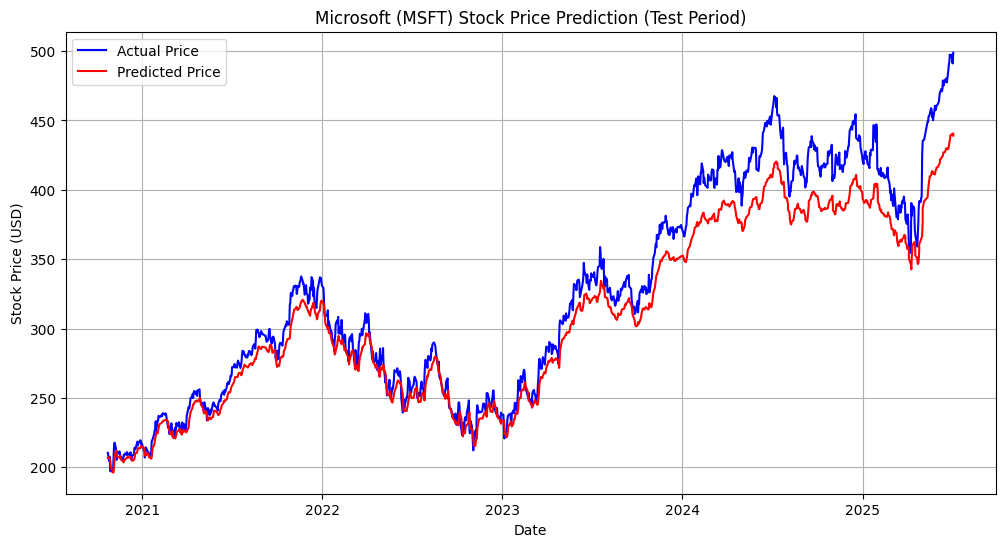

Training Close Price Range: 11.32756519 to 208.0892487
Testing  Close Price Range: 195.0345764 to 498.8399963


In [5]:
# ==========================
# LSTM Stock Price Prediction (Fixed Version)
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==========================
# 1. Load & preprocess
# ==========================
df = pd.read_csv("Dataset.csv")

# Filter for Apple stock (AAPL)
apple_data = df[df['Ticker'] == 'MSFT'].copy()

# Convert Date to datetime and sort
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data = apple_data.sort_values('Date')

# Use only 'Close' price
close_prices = apple_data[['Close']].values

# ==========================
# 2. Train-Test Split (by time)
# ==========================
train_size = int(len(close_prices) * 0.8)
train_data = close_prices[:train_size]
test_data = close_prices[train_size:]

# Print date ranges for clarity
print("Training period:", apple_data['Date'].iloc[0], "to", apple_data['Date'].iloc[train_size-1])
print("Testing period: ", apple_data['Date'].iloc[train_size], "to", apple_data['Date'].iloc[-1])

# ==========================
# 3. Scaling
# ==========================
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(train_data)
scaled_test = scaler.transform(test_data)

# ==========================
# 4. Create sequences separately for train & test
# ==========================
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X_train, y_train = create_sequences(scaled_train, time_steps)
X_test, y_test = create_sequences(scaled_test, time_steps)

# Reshape for LSTM (samples, time_steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test,  (X_test.shape[0],  X_test.shape[1],  1))

# ==========================
# 5. Build the LSTM Model
# ==========================
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.1),
    LSTM(100, return_sequences=False),
    Dropout(0.1),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ==========================
# 6. Train Model
# ==========================
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=150,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# ==========================
# 7. Make Predictions
# ==========================
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1,1))

# ==========================
# 8. Evaluation
# ==========================
rmse = np.sqrt(mean_squared_error(actual, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# ==========================
# 9. Visualization
# ==========================
# Align test dates to sequence output (skip first 60 days)
test_dates = apple_data['Date'].iloc[train_size + time_steps:]

plt.figure(figsize=(12,6))
plt.plot(test_dates, actual, color='blue', label='Actual Price')
plt.plot(test_dates, predictions, color='red', label='Predicted Price')
plt.title("Microsoft (MSFT) Stock Price Prediction (Test Period)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# ==========================
# 10. Optional: Range Info
# ==========================
print("Training Close Price Range:", train_data.min(), "to", train_data.max())
print("Testing  Close Price Range:", test_data.min(), "to", test_data.max())

Training period: 2000-01-03 00:00:00-05:00 to 2020-07-29 00:00:00-04:00
Testing period:  2020-07-30 00:00:00-04:00 to 2025-07-03 00:00:00-04:00
Epoch 1/150


C:\Users\me\AppData\Local\Temp\ipykernel_17088\3345536002.py:22: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  apple_data['Date'] = pd.to_datetime(apple_data['Date'])
c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


144/144 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 6.9594e-04 - val_loss: 0.0019
Epoch 2/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 1.2196e-04 - val_loss: 0.0021
Epoch 3/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 1.4852e-04 - val_loss: 0.0013
Epoch 4/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 1.1832e-04 - val_loss: 0.0013
Epoch 5/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 1.2618e-04 - val_loss: 0.0013
Epoch 6/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 1.1375e-04 - val_loss: 0.0037
Epoch 7/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 1.3058e-04 - val_loss: 0.0018
Epoch 8/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 9.6245e-05 - val_loss: 0.0010
Epoch 9/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 9.2256e-05 - val_loss: 0.0028
Epoch 10/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 9.7162e-05 - val_loss: 0.0013
Epoch 11/150
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 8.9522e-05 - val_loss: 0.00

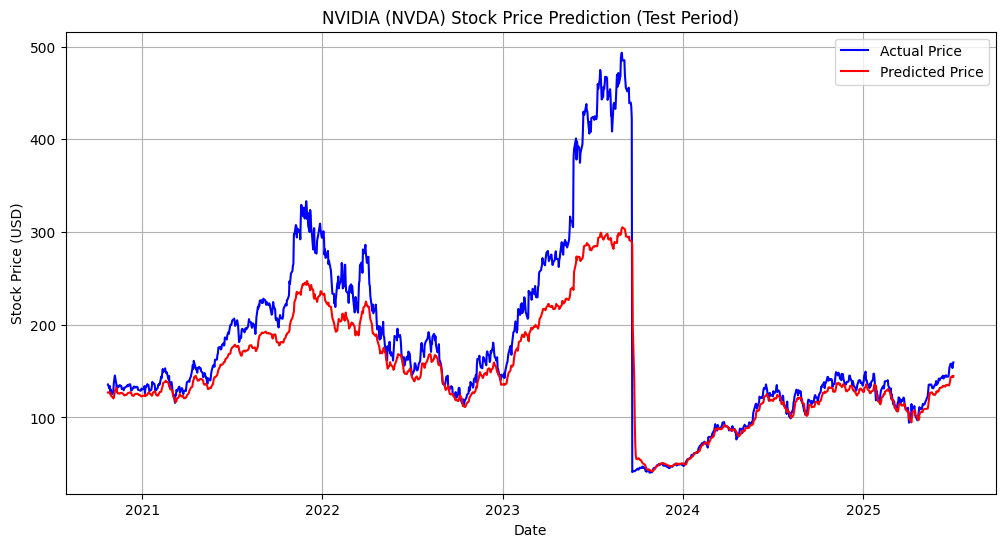

Training Close Price Range: 0.563452721 to 104.8180161
Testing  Close Price Range: 40.31725311 to 493.5093384


In [2]:
# ==========================
# LSTM Stock Price Prediction (Fixed Version)
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==========================
# 1. Load & preprocess
# ==========================
df = pd.read_csv("Dataset.csv")

# Filter for Apple stock (AAPL)
apple_data = df[df['Ticker'] == 'NVDA'].copy()

# Convert Date to datetime and sort
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data = apple_data.sort_values('Date')

# Use only 'Close' price
close_prices = apple_data[['Close']].values

# ==========================
# 2. Train-Test Split (by time)
# ==========================
train_size = int(len(close_prices) * 0.8)
train_data = close_prices[:train_size]
test_data = close_prices[train_size:]

# Print date ranges for clarity
print("Training period:", apple_data['Date'].iloc[0], "to", apple_data['Date'].iloc[train_size-1])
print("Testing period: ", apple_data['Date'].iloc[train_size], "to", apple_data['Date'].iloc[-1])

# ==========================
# 3. Scaling
# ==========================
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(train_data)
scaled_test = scaler.transform(test_data)

# ==========================
# 4. Create sequences separately for train & test
# ==========================
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X_train, y_train = create_sequences(scaled_train, time_steps)
X_test, y_test = create_sequences(scaled_test, time_steps)

# Reshape for LSTM (samples, time_steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test,  (X_test.shape[0],  X_test.shape[1],  1))

# ==========================
# 5. Build the LSTM Model
# ==========================
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.1),
    LSTM(100, return_sequences=False),
    Dropout(0.1),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ==========================
# 6. Train Model
# ==========================
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=150,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# ==========================
# 7. Make Predictions
# ==========================
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1,1))

# ==========================
# 8. Evaluation
# ==========================
rmse = np.sqrt(mean_squared_error(actual, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# ==========================
# 9. Visualization
# ==========================
# Align test dates to sequence output (skip first 60 days)
test_dates = apple_data['Date'].iloc[train_size + time_steps:]

plt.figure(figsize=(12,6))
plt.plot(test_dates, actual, color='blue', label='Actual Price')
plt.plot(test_dates, predictions, color='red', label='Predicted Price')
plt.title("NVIDIA (NVDA) Stock Price Prediction (Test Period)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# ==========================
# 10. Optional: Range Info
# ==========================
print("Training Close Price Range:", train_data.min(), "to", train_data.max())
print("Testing  Close Price Range:", test_data.min(), "to", test_data.max())

Training period: 2004-08-19 00:00:00-04:00 to 2021-06-30 00:00:00-04:00
Testing period:  2021-07-01 00:00:00-04:00 to 2025-07-03 00:00:00-04:00
Epoch 1/150


C:\Users\me\AppData\Local\Temp\ipykernel_17088\1425269783.py:22: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  apple_data['Date'] = pd.to_datetime(apple_data['Date'])
c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 2/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 1.8230e-04 - val_loss: 0.0018
Epoch 3/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 1.6651e-04 - val_loss: 9.4615e-04
Epoch 4/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 1.5558e-04 - val_loss: 7.7875e-04
Epoch 5/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 1.6286e-04 - val_loss: 8.5488e-04
Epoch 6/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 1.4676e-04 - val_loss: 6.1778e-04
Epoch 7/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 1.4120e-04 - val_loss: 0.0012
Epoch 8/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 1.1468e-04 - val_loss: 0.0016
Epoch 9/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 1.2543e-04 - val_loss: 5.7787e-04
Epoch 10/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 1.0791e-04 - val_loss: 7.8229e-04
Epoch 11/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 1.0331e-

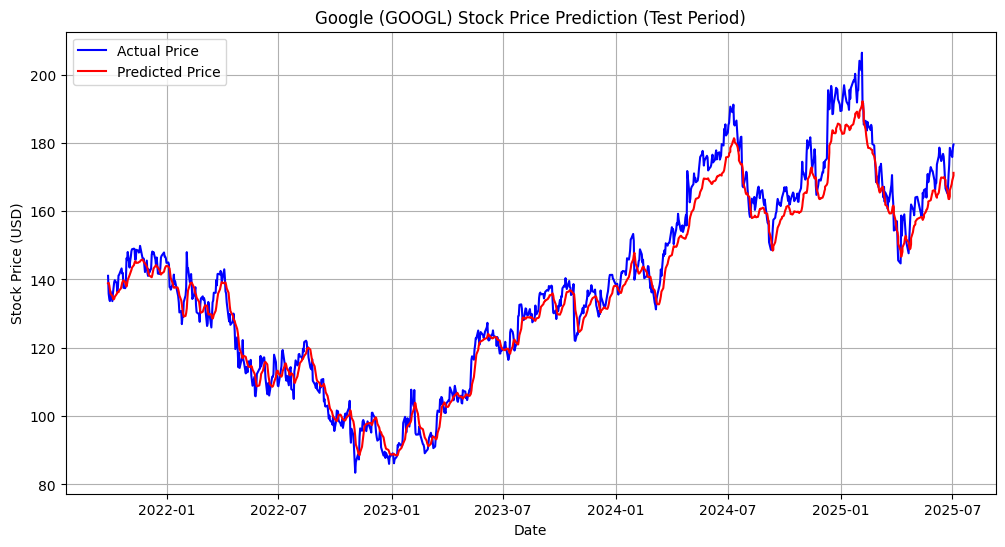

Training Close Price Range: 2.502753019 to 122.5360031
Testing  Close Price Range: 83.43000031 to 206.3800049


In [3]:
# ==========================
# LSTM Stock Price Prediction (Fixed Version)
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==========================
# 1. Load & preprocess
# ==========================
df = pd.read_csv("Dataset.csv")

# Filter for Apple stock (AAPL)
apple_data = df[df['Ticker'] == 'GOOGL'].copy()

# Convert Date to datetime and sort
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data = apple_data.sort_values('Date')

# Use only 'Close' price
close_prices = apple_data[['Close']].values

# ==========================
# 2. Train-Test Split (by time)
# ==========================
train_size = int(len(close_prices) * 0.8)
train_data = close_prices[:train_size]
test_data = close_prices[train_size:]

# Print date ranges for clarity
print("Training period:", apple_data['Date'].iloc[0], "to", apple_data['Date'].iloc[train_size-1])
print("Testing period: ", apple_data['Date'].iloc[train_size], "to", apple_data['Date'].iloc[-1])

# ==========================
# 3. Scaling
# ==========================
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(train_data)
scaled_test = scaler.transform(test_data)

# ==========================
# 4. Create sequences separately for train & test
# ==========================
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X_train, y_train = create_sequences(scaled_train, time_steps)
X_test, y_test = create_sequences(scaled_test, time_steps)

# Reshape for LSTM (samples, time_steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test,  (X_test.shape[0],  X_test.shape[1],  1))

# ==========================
# 5. Build the LSTM Model
# ==========================
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.1),
    LSTM(100, return_sequences=False),
    Dropout(0.1),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ==========================
# 6. Train Model
# ==========================
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=150,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# ==========================
# 7. Make Predictions
# ==========================
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1,1))

# ==========================
# 8. Evaluation
# ==========================
rmse = np.sqrt(mean_squared_error(actual, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# ==========================
# 9. Visualization
# ==========================
# Align test dates to sequence output (skip first 60 days)
test_dates = apple_data['Date'].iloc[train_size + time_steps:]

plt.figure(figsize=(12,6))
plt.plot(test_dates, actual, color='blue', label='Actual Price')
plt.plot(test_dates, predictions, color='red', label='Predicted Price')
plt.title("Google (GOOGL) Stock Price Prediction (Test Period)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# ==========================
# 10. Optional: Range Info
# ==========================
print("Training Close Price Range:", train_data.min(), "to", train_data.max())
print("Testing  Close Price Range:", test_data.min(), "to", test_data.max())

Epoch 1/150


C:\Users\me\AppData\Local\Temp\ipykernel_17088\3195976783.py:21: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])
c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 0.0025
Epoch 2/150
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 4.2807e-04
Epoch 3/150
201/201 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - loss: 4.0266e-04
Epoch 4/150
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 2.7618e-04
Epoch 5/150
201/201 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 2.7226e-04
Epoch 6/150
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 2.4085e-04
Epoch 7/150
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 2.9125e-04
Epoch 8/150
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 2.6168e-04
Epoch 9/150
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 3.1929e-04
Epoch 10/150
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 2.3315e-04
Epoch 11/150
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 2.1814e-04
Epoch 12/150
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 2.6872e-04
Epoch 13/150
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 1.8872e-04
Epoch 14/150
201/201 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms

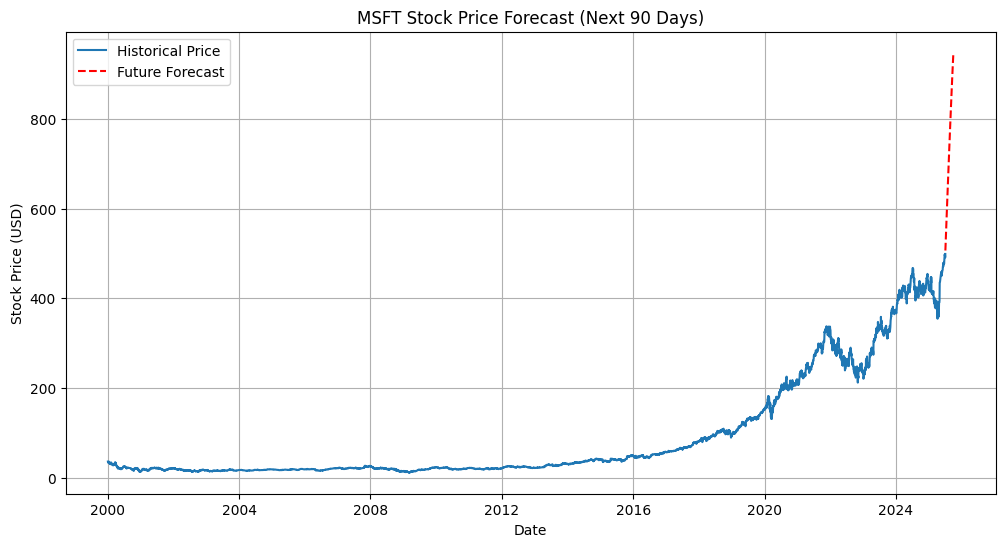

In [ ]:
# ==========================
# LSTM Stock Price Forecasting (Future Prediction)
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==========================
# 1. Load & preprocess
# ==========================
df = pd.read_csv("Dataset.csv")

# Select your stock (MSFT)
stock_data = df[df['Ticker'] == 'MSFT'].copy()

# Date conversion & sort
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.sort_values('Date')

# Use only 'Close' column
close_prices = stock_data[['Close']].values

# ==========================
# 2. Scaling (whole dataset)
# ==========================
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_prices)

# ==========================
# 3. Create training sequences
# ==========================
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X_train, y_train = create_sequences(scaled_data, time_steps)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# ==========================
# 4. Build Model
# ==========================
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.1),
    LSTM(100, return_sequences=False),
    Dropout(0.1),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ==========================
# 5. Train Model
# ==========================
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=150,
    callbacks=[early_stop],
    verbose=1
)

# ==========================
# 6. Future Prediction (Next N Days)
# ==========================
future_days = 90  # change this to how many days ahead you want to forecast
last_sequence = scaled_data[-time_steps:]  # last 60 days

predictions_scaled = []

for _ in range(future_days):
    X_input = last_sequence.reshape((1, time_steps, 1))
    pred = model.predict(X_input, verbose=0)
    predictions_scaled.append(pred[0,0])
    # Append prediction and remove oldest value
    last_sequence = np.append(last_sequence[1:], pred[0,0])
    
# Inverse scale the predictions
predictions = scaler.inverse_transform(np.array(predictions_scaled).reshape(-1, 1))

# ==========================
# 7. Visualization
# ==========================
# Create future date range
last_date = stock_data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

plt.figure(figsize=(12,6))
plt.plot(stock_data['Date'], close_prices, label='Historical Price')
plt.plot(future_dates, predictions, color='red', linestyle='--', label='Future Forecast')
plt.title("MSFT Stock Price Forecast (Next {} Days)".format(future_days))
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

Using data from 2024-07-01 to 2025-07-03
Total records used: 304
Epoch 1/100


c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0989
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0205
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0152
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0110
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0096
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0091
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0084
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0085
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0084
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0074
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0064
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0068
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0073
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0063
Epoch 15/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0069
E

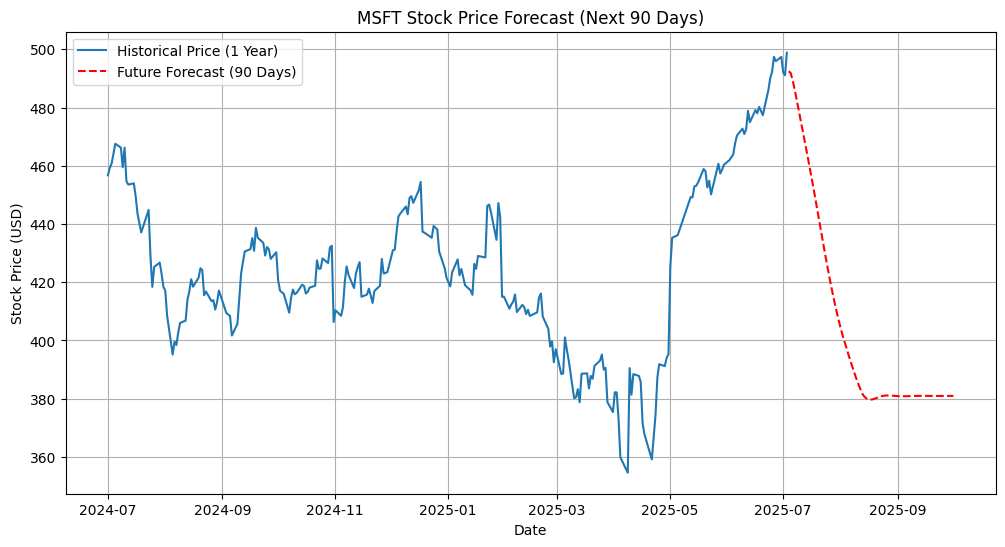

In [9]:
# ==========================
# LSTM Stock Price Forecasting (Future Prediction)
# ==========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==========================
# 1. Load & preprocess
# ==========================

# Load dataset
df = pd.read_csv("Dataset.csv")

# Select your stock (MSFT)
stock_data = df[df['Ticker'] == 'MSFT'].copy()

# Convert 'Date' to datetime (handles timezone automatically)
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True)
# Remove timezone info
stock_data['Date'] = stock_data['Date'].dt.tz_localize(None)

# Sort by date
stock_data = stock_data.sort_values('Date')

# ==========================
# Use only data from July 2024 to July 2025
# ==========================
start_date = "2024-07-01"
end_date = "2025-07-31"
stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)].copy()

# Ensure we have enough data
print(f"Using data from {stock_data['Date'].min().date()} to {stock_data['Date'].max().date()}")
print(f"Total records used: {len(stock_data)}")

# Use only the 'Close' column for prediction
close_prices = stock_data[['Close']].values

# ==========================
# 2. Scaling (whole dataset)
# ==========================
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# ==========================
# 3. Create training sequences
# ==========================
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 30  # smaller window since only 1 year of data
X_train, y_train = create_sequences(scaled_data, time_steps)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# ==========================
# 4. Build Model
# ==========================
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.1),
    LSTM(64, return_sequences=False),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ==========================
# 5. Train Model
# ==========================
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

# ==========================
# 6. Future Prediction (Next N Days)
# ==========================
future_days = 90  # forecast next 90 days
last_sequence = scaled_data[-time_steps:]  # last 30 days as input

predictions_scaled = []

for _ in range(future_days):
    X_input = last_sequence.reshape((1, time_steps, 1))
    pred = model.predict(X_input, verbose=0)
    predictions_scaled.append(pred[0, 0])
    # Update sequence (append new pred, remove oldest)
    last_sequence = np.append(last_sequence[1:], pred[0, 0])

# Inverse scale predictions
predictions = scaler.inverse_transform(np.array(predictions_scaled).reshape(-1, 1))

# ==========================
# 7. Visualization
# ==========================
# Create future date range
last_date = stock_data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], close_prices, label='Historical Price (1 Year)')
plt.plot(future_dates, predictions, color='red', linestyle='--', label=f'Future Forecast ({future_days} Days)')
plt.title(f"MSFT Stock Price Forecast (Next {future_days} Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

Using data from 2024-06-03 to 2025-07-03
Total records available: 326
Training shape: X=(296, 30, 3), y=(296,)
Epoch 1/100


c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0405
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0177
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0149
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0118
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0099
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0101
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0087
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0083
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0085
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0078
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0073
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0086
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0085
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0076
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0067
E

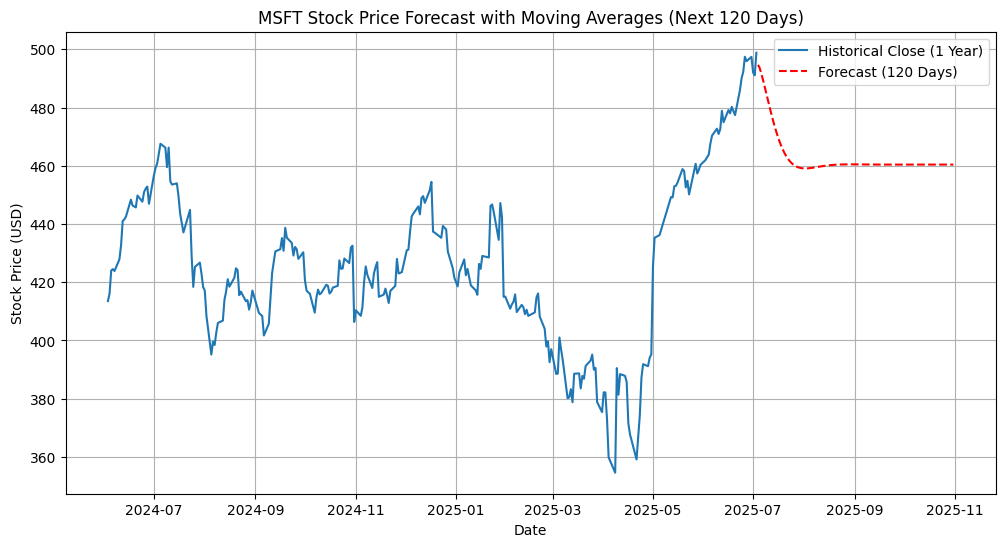

In [12]:
# ==========================
# LSTM Stock Price Forecasting (Future Prediction)
# Using Close + MA7 + MA14 (Moving Averages)
# ==========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==========================
# 1. Load & preprocess
# ==========================

# Load dataset
df = pd.read_csv("Dataset.csv")

# Select your stock (MSFT)
stock_data = df[df['Ticker'] == 'MSFT'].copy()

# Convert 'Date' to datetime and remove timezone info
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True)
stock_data['Date'] = stock_data['Date'].dt.tz_localize(None)

# Sort by date
stock_data = stock_data.sort_values('Date')

# ==========================
# Use only data from July 2024 to July 2025 (+ buffer)
# ==========================
start_date = "2024-06-01"  # buffer for moving average calculation
end_date = "2025-07-31"
stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)].copy()

# ==========================
# Add Moving Averages safely
# ==========================
stock_data['MA7'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['MA14'] = stock_data['Close'].rolling(window=14, min_periods=1).mean()

# Check how much data remains
print(f"Using data from {stock_data['Date'].min().date()} to {stock_data['Date'].max().date()}")
print(f"Total records available: {len(stock_data)}")

if len(stock_data) < 50:
    raise ValueError("Not enough data points in the selected date range. Try expanding the date window.")

# ==========================
# 2. Prepare features & scaling
# ==========================
# Select features (Close, MA7, MA14)
features = stock_data[['Close', 'MA7', 'MA14']].values

# Scale features to 0–1 range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)

# ==========================
# 3. Create training sequences
# ==========================
def create_sequences_multifeature(data, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, :])  # input = all features
        y.append(data[i, 0])                 # target = 'Close'
    return np.array(X), np.array(y)

time_steps = 30  # lookback window
X_train, y_train = create_sequences_multifeature(scaled_data, time_steps)

print(f"Training shape: X={X_train.shape}, y={y_train.shape}")

# ==========================
# 4. Build Model
# ==========================
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ==========================
# 5. Train Model
# ==========================
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

# ==========================
# 6. Future Prediction (Next N Days)
# ==========================
future_days = 120
last_sequence = scaled_data[-time_steps:]  # last 30 time steps (all features)

predictions_scaled = []

for _ in range(future_days):
    X_input = last_sequence.reshape((1, time_steps, scaled_data.shape[1]))
    pred = model.predict(X_input, verbose=0)
    predictions_scaled.append(pred[0, 0])

    # For future timesteps, approximate MA7/MA14 from last known ratios
    new_row = last_sequence[-1].copy()
    new_row[0] = pred[0, 0]  # replace Close with predicted value
    last_sequence = np.vstack((last_sequence[1:], new_row))

# Inverse transform predictions
dummy_pad = np.zeros((len(predictions_scaled), scaled_data.shape[1]))
dummy_pad[:, 0] = predictions_scaled  # only Close column used
predictions = scaler.inverse_transform(dummy_pad)[:, 0].reshape(-1, 1)

# ==========================
# 7. Visualization
# ==========================
# Create future date range
last_date = stock_data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'].values, label='Historical Close (1 Year)')
plt.plot(future_dates, predictions, color='red', linestyle='--', label=f'Forecast ({future_days} Days)')
plt.title(f"MSFT Stock Price Forecast with Moving Averages (Next {future_days} Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

Using data from 2024-06-03 to 2025-07-03
Total records available: 326
Training shape: X=(296, 30, 3), y=(296,)


c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0606
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0182
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0142
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0117
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0105
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0100
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0097
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0086
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0098
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0085
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0077
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0084
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0077
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0072
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - lo

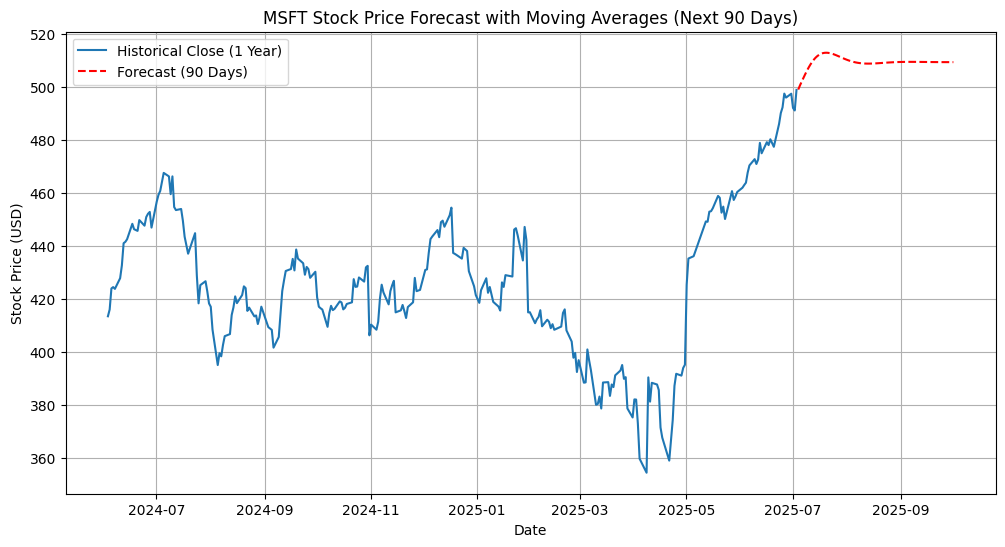

In [14]:
# ==========================
# LSTM Stock Price Forecasting (Future Prediction)
# Using Close + MA7 + MA14 (Moving Averages)
# ==========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==========================
# 1. Load & preprocess
# ==========================

# Load dataset
df = pd.read_csv("Dataset.csv")

# Select your stock (MSFT)
stock_data = df[df['Ticker'] == 'MSFT'].copy()

# Convert 'Date' to datetime and remove timezone info
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True)
stock_data['Date'] = stock_data['Date'].dt.tz_localize(None)

# Sort by date
stock_data = stock_data.sort_values('Date')

# ==========================
# Use only data from July 2024 to July 2025 (+ buffer)
# ==========================
start_date = "2024-06-01"  # buffer for moving average calculation
end_date = "2025-07-31"
stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)].copy()

# ==========================
# Add Moving Averages safely
# ==========================
stock_data['MA7'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['MA14'] = stock_data['Close'].rolling(window=14, min_periods=1).mean()

# Check how much data remains
print(f"Using data from {stock_data['Date'].min().date()} to {stock_data['Date'].max().date()}")
print(f"Total records available: {len(stock_data)}")

if len(stock_data) < 50:
    raise ValueError("Not enough data points in the selected date range. Try expanding the date window.")

# ==========================
# 2. Prepare features & scaling
# ==========================
# Select features (Close, MA7, MA14)
features = stock_data[['Close', 'MA7', 'MA14']].values

# Scale features to 0–1 range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)

# ==========================
# 3. Create training sequences
# ==========================
def create_sequences_multifeature(data, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, :])  # input = all features
        y.append(data[i, 0])                 # target = 'Close'
    return np.array(X), np.array(y)

time_steps = 30  # lookback window
X_train, y_train = create_sequences_multifeature(scaled_data, time_steps)

print(f"Training shape: X={X_train.shape}, y={y_train.shape}")

# ==========================
# 4. Build Model
# ==========================
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ==========================
# 5. Train Model
# ==========================
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

# ==========================
# 6. Future Prediction (Next N Days)
# ==========================
future_days = 90
last_sequence = scaled_data[-time_steps:]  # last 30 time steps (all features)

predictions_scaled = []

for _ in range(future_days):
    X_input = last_sequence.reshape((1, time_steps, scaled_data.shape[1]))
    pred = model.predict(X_input, verbose=0)
    predictions_scaled.append(pred[0, 0])

    # For future timesteps, approximate MA7/MA14 from last known ratios
    new_row = last_sequence[-1].copy()
    new_row[0] = pred[0, 0]  # replace Close with predicted value
    last_sequence = np.vstack((last_sequence[1:], new_row))

# Inverse transform predictions
dummy_pad = np.zeros((len(predictions_scaled), scaled_data.shape[1]))
dummy_pad[:, 0] = predictions_scaled  # only Close column used
predictions = scaler.inverse_transform(dummy_pad)[:, 0].reshape(-1, 1)

# ==========================
# 7. Visualization
# ==========================
# Create future date range
last_date = stock_data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'].values, label='Historical Close (1 Year)')
plt.plot(future_dates, predictions, color='red', linestyle='--', label=f'Forecast ({future_days} Days)')
plt.title(f"MSFT Stock Price Forecast with Moving Averages (Next {future_days} Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

✅ Loaded 6470 rows for MSFT
📅 Available date range: 2000-01-03 → 2025-07-03
✅ Using 809 records from 2022-07-05 → 2025-07-03
📊 Records after indicator calculation: 14
✅ Scaled data shape: (14, 4)
🕒 Using time_steps=5
✅ Training data shape: X=(9, 5, 4), y=(9,)


c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.6788
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5427
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3998
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2546
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1449
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0781
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0760
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1511
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1588
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1013
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0812
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0670
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0558
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0599
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0571
Epoch 16/100
2/2 ━━

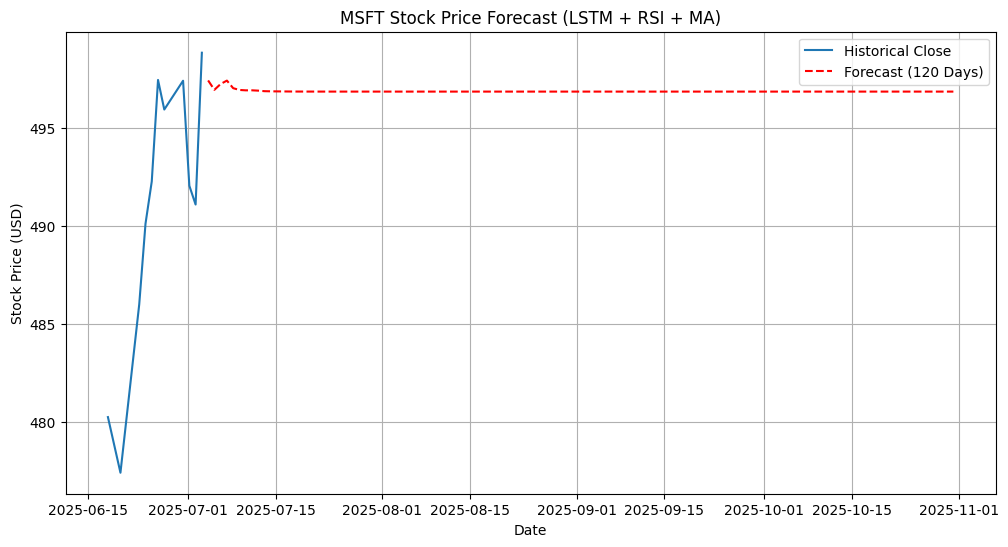

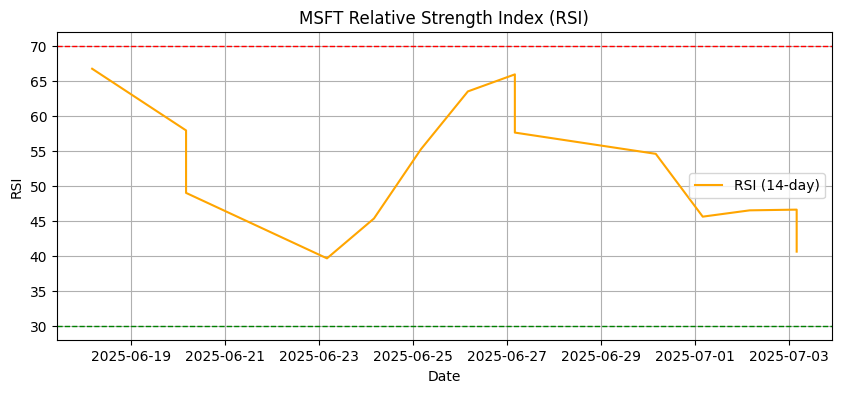

In [6]:
# ==========================
# LSTM Stock Price Forecasting (Auto Range + RSI + MA + Adaptive Fix)
# ==========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==========================
# 1. Load & Clean Data
# ==========================

df = pd.read_csv("Dataset.csv")

ticker = "MSFT"
stock_data = df[df['Ticker'] == ticker].copy()
print(f"✅ Loaded {len(stock_data)} rows for {ticker}")

# Convert Date safely
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce', utc=True)
stock_data['Date'] = stock_data['Date'].dt.tz_localize(None)
stock_data = stock_data.dropna(subset=['Date'])
stock_data = stock_data.sort_values('Date')
stock_data = stock_data.dropna(subset=['Close'])
stock_data = stock_data[stock_data['Close'] > 0]

print(f"📅 Available date range: {stock_data['Date'].min().date()} → {stock_data['Date'].max().date()}")

# ==========================
# Auto-select last 3 years
# ==========================
latest_date = stock_data['Date'].max()
start_date = latest_date - pd.DateOffset(years=3)
filtered = stock_data[stock_data['Date'] >= start_date].copy()

if len(filtered) == 0:
    raise ValueError("❌ No data found in the last 3 years — check your dataset or Ticker symbol.")

print(f"✅ Using {len(filtered)} records from {filtered['Date'].min().date()} → {filtered['Date'].max().date()}")

# ==========================
# 2. Add Technical Indicators
# ==========================

filtered['MA7'] = filtered['Close'].rolling(window=7, min_periods=1).mean()
filtered['MA14'] = filtered['Close'].rolling(window=14, min_periods=1).mean()

# RSI Calculation
delta = filtered['Close'].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
avg_gain = pd.Series(gain).rolling(window=14, min_periods=1).mean()
avg_loss = pd.Series(loss).rolling(window=14, min_periods=1).mean()
rs = avg_gain / (avg_loss + 1e-10)
filtered['RSI'] = 100 - (100 / (1 + rs))
filtered['RSI'] = filtered['RSI'].rolling(window=3, min_periods=1).mean()

filtered = filtered.dropna(subset=['Close', 'MA7', 'MA14', 'RSI'])
print(f"📊 Records after indicator calculation: {len(filtered)}")

# ==========================
# 3. Feature Scaling
# ==========================

features = filtered[['Close', 'MA7', 'MA14', 'RSI']].values
if len(features) < 10:
    raise ValueError(f"❌ Too few data points ({len(features)}) after filtering. Try expanding the date range or using fewer indicators.")

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)
print(f"✅ Scaled data shape: {scaled_data.shape}")

# ==========================
# 4. Create Sequences
# ==========================

def create_sequences_multifeature(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, :])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Adaptive time_steps (smaller for short datasets)
if len(filtered) > 250:
    time_steps = 60
elif len(filtered) > 100:
    time_steps = 30
elif len(filtered) > 30:
    time_steps = 10
else:
    time_steps = 5

print(f"🕒 Using time_steps={time_steps}")

X_train, y_train = create_sequences_multifeature(scaled_data, time_steps)
print(f"✅ Training data shape: X={X_train.shape}, y={y_train.shape}")

if len(X_train) == 0:
    raise ValueError(f"❌ Not enough data to create sequences. Need > {time_steps} rows after indicators. Currently: {len(filtered)}")

# ==========================
# 5. Build & Train Model
# ==========================

model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=8,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

# ==========================
# 6. Future Forecast
# ==========================

future_days = 120
last_sequence = scaled_data[-time_steps:]
predictions_scaled = []

for _ in range(future_days):
    X_input = last_sequence.reshape((1, time_steps, scaled_data.shape[1]))
    pred = model.predict(X_input, verbose=0)
    predictions_scaled.append(pred[0, 0])

    # Update sequence
    new_row = last_sequence[-1].copy()
    new_row[0] = pred[0, 0]
    last_sequence = np.vstack((last_sequence[1:], new_row))

# Inverse transform
dummy = np.zeros((len(predictions_scaled), scaled_data.shape[1]))
dummy[:, 0] = predictions_scaled
predictions = scaler.inverse_transform(dummy)[:, 0].reshape(-1, 1)

# ==========================
# 7. Visualization
# ==========================

last_date = filtered['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

plt.figure(figsize=(12, 6))
plt.plot(filtered['Date'], filtered['Close'], label='Historical Close')
plt.plot(future_dates, predictions, color='red', linestyle='--', label=f'Forecast ({future_days} Days)')
plt.title(f"{ticker} Stock Price Forecast (LSTM + RSI + MA)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# ==========================
# 8. RSI Visualization
# ==========================

plt.figure(figsize=(10, 4))
plt.plot(filtered['Date'], filtered['RSI'], color='orange', label='RSI (14-day)')
plt.axhline(70, color='red', linestyle='--', linewidth=1)
plt.axhline(30, color='green', linestyle='--', linewidth=1)
plt.title(f"{ticker} Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.show()

Using data from 2024-06-03 to 2025-07-03
Total records available: 326
Training shape: X=(296, 30, 3), y=(296,)


c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0569
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0149
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0133
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0120
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0144
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0113
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0104
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0102
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0099
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0107
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0102
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0088
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0106
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0088
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - lo

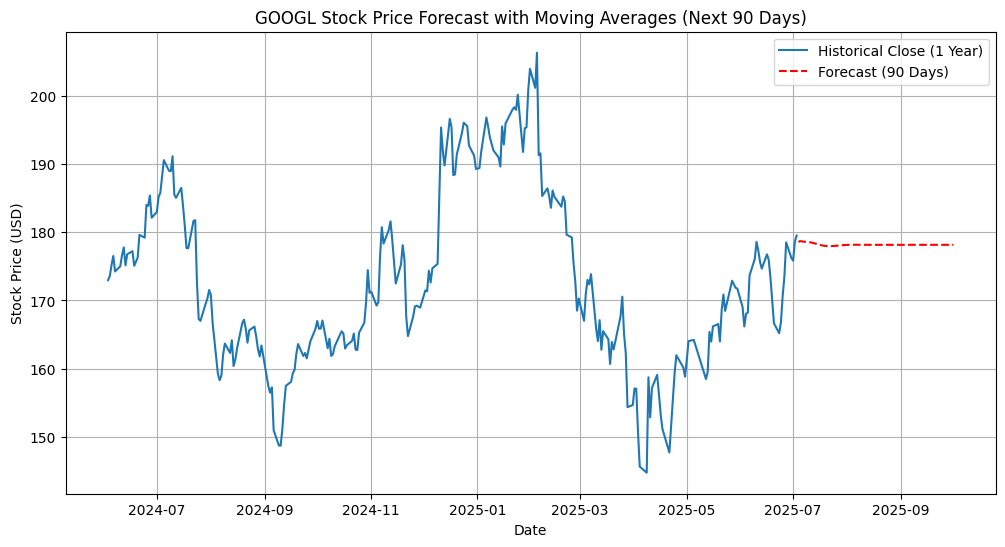

In [2]:
# ==========================
# LSTM Stock Price Forecasting (Future Prediction)
# Using Close + MA7 + MA14 (Moving Averages)
# ==========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==========================
# 1. Load & preprocess
# ==========================

# Load dataset
df = pd.read_csv("Dataset.csv")

# Select your stock (MSFT)
stock_data = df[df['Ticker'] == 'GOOGL'].copy()

# Convert 'Date' to datetime and remove timezone info
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True)
stock_data['Date'] = stock_data['Date'].dt.tz_localize(None)

# Sort by date
stock_data = stock_data.sort_values('Date')

# ==========================
# Use only data from July 2024 to July 2025 (+ buffer)
# ==========================
start_date = "2024-06-01"  # buffer for moving average calculation
end_date = "2025-07-31"
stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)].copy()

# ==========================
# Add Moving Averages safely
# ==========================
stock_data['MA7'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['MA14'] = stock_data['Close'].rolling(window=14, min_periods=1).mean()

# Check how much data remains
print(f"Using data from {stock_data['Date'].min().date()} to {stock_data['Date'].max().date()}")
print(f"Total records available: {len(stock_data)}")

if len(stock_data) < 50:
    raise ValueError("Not enough data points in the selected date range. Try expanding the date window.")

# ==========================
# 2. Prepare features & scaling
# ==========================
# Select features (Close, MA7, MA14)
features = stock_data[['Close', 'MA7', 'MA14']].values

# Scale features to 0–1 range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)

# ==========================
# 3. Create training sequences
# ==========================
def create_sequences_multifeature(data, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, :])  # input = all features
        y.append(data[i, 0])                 # target = 'Close'
    return np.array(X), np.array(y)

time_steps = 30  # lookback window
X_train, y_train = create_sequences_multifeature(scaled_data, time_steps)

print(f"Training shape: X={X_train.shape}, y={y_train.shape}")

# ==========================
# 4. Build Model
# ==========================
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ==========================
# 5. Train Model
# ==========================
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

# ==========================
# 6. Future Prediction (Next N Days)
# ==========================
future_days = 90
last_sequence = scaled_data[-time_steps:]  # last 30 time steps (all features)

predictions_scaled = []

for _ in range(future_days):
    X_input = last_sequence.reshape((1, time_steps, scaled_data.shape[1]))
    pred = model.predict(X_input, verbose=0)
    predictions_scaled.append(pred[0, 0])

    # For future timesteps, approximate MA7/MA14 from last known ratios
    new_row = last_sequence[-1].copy()
    new_row[0] = pred[0, 0]  # replace Close with predicted value
    last_sequence = np.vstack((last_sequence[1:], new_row))

# Inverse transform predictions
dummy_pad = np.zeros((len(predictions_scaled), scaled_data.shape[1]))
dummy_pad[:, 0] = predictions_scaled  # only Close column used
predictions = scaler.inverse_transform(dummy_pad)[:, 0].reshape(-1, 1)

# ==========================
# 7. Visualization
# ==========================
# Create future date range
last_date = stock_data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'].values, label='Historical Close (1 Year)')
plt.plot(future_dates, predictions, color='red', linestyle='--', label=f'Forecast ({future_days} Days)')
plt.title(f"GOOGL Stock Price Forecast with Moving Averages (Next {future_days} Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

Using data from 2024-06-03 to 2025-07-03
Total records available: 326
Training shape: X=(296, 30, 3), y=(296,)


c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0804
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0199
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0168
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0146
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0139
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0110
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0110
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0107
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0107
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0086
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0085
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0089
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0078
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0071
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - lo

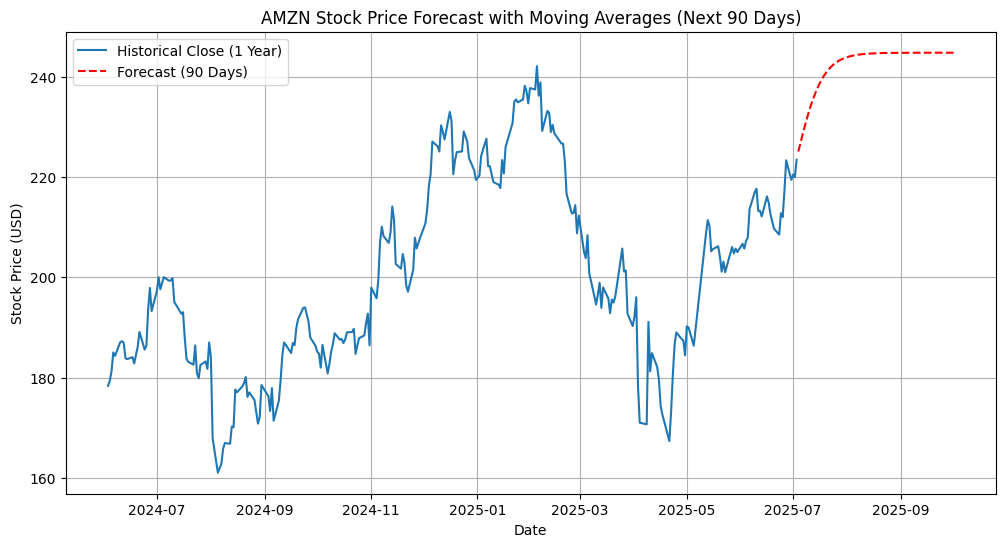

In [4]:
# ==========================
# LSTM Stock Price Forecasting (Future Prediction)
# Using Close + MA7 + MA14 (Moving Averages)
# ==========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==========================
# 1. Load & preprocess
# ==========================

# Load dataset
df = pd.read_csv("Dataset.csv")

# Select your stock (MSFT)
stock_data = df[df['Ticker'] == 'AMZN'].copy()

# Convert 'Date' to datetime and remove timezone info
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True)
stock_data['Date'] = stock_data['Date'].dt.tz_localize(None)

# Sort by date
stock_data = stock_data.sort_values('Date')

# ==========================
# Use only data from July 2024 to July 2025 (+ buffer)
# ==========================
start_date = "2024-06-01"  # buffer for moving average calculation
end_date = "2025-07-31"
stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)].copy()

# ==========================
# Add Moving Averages safely
# ==========================
stock_data['MA7'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['MA14'] = stock_data['Close'].rolling(window=14, min_periods=1).mean()

# Check how much data remains
print(f"Using data from {stock_data['Date'].min().date()} to {stock_data['Date'].max().date()}")
print(f"Total records available: {len(stock_data)}")

if len(stock_data) < 50:
    raise ValueError("Not enough data points in the selected date range. Try expanding the date window.")

# ==========================
# 2. Prepare features & scaling
# ==========================
# Select features (Close, MA7, MA14)
features = stock_data[['Close', 'MA7', 'MA14']].values

# Scale features to 0–1 range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)

# ==========================
# 3. Create training sequences
# ==========================
def create_sequences_multifeature(data, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, :])  # input = all features
        y.append(data[i, 0])                 # target = 'Close'
    return np.array(X), np.array(y)

time_steps = 30  # lookback window
X_train, y_train = create_sequences_multifeature(scaled_data, time_steps)

print(f"Training shape: X={X_train.shape}, y={y_train.shape}")

# ==========================
# 4. Build Model
# ==========================
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ==========================
# 5. Train Model
# ==========================
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

# ==========================
# 6. Future Prediction (Next N Days)
# ==========================
future_days = 90
last_sequence = scaled_data[-time_steps:]  # last 30 time steps (all features)

predictions_scaled = []

for _ in range(future_days):
    X_input = last_sequence.reshape((1, time_steps, scaled_data.shape[1]))
    pred = model.predict(X_input, verbose=0)
    predictions_scaled.append(pred[0, 0])

    # For future timesteps, approximate MA7/MA14 from last known ratios
    new_row = last_sequence[-1].copy()
    new_row[0] = pred[0, 0]  # replace Close with predicted value
    last_sequence = np.vstack((last_sequence[1:], new_row))

# Inverse transform predictions
dummy_pad = np.zeros((len(predictions_scaled), scaled_data.shape[1]))
dummy_pad[:, 0] = predictions_scaled  # only Close column used
predictions = scaler.inverse_transform(dummy_pad)[:, 0].reshape(-1, 1)

# ==========================
# 7. Visualization
# ==========================
# Create future date range
last_date = stock_data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'].values, label='Historical Close (1 Year)')
plt.plot(future_dates, predictions, color='red', linestyle='--', label=f'Forecast ({future_days} Days)')
plt.title(f"AMZN Stock Price Forecast with Moving Averages (Next {future_days} Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

Using data from 2024-06-03 to 2025-07-03
Total records available: 326
Training shape: X=(296, 30, 3), y=(296,)


c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.0535
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0187
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0149
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0110
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0122
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0113
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0114
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0097
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0101
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0090
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0092
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0084
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0076
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0081
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - l

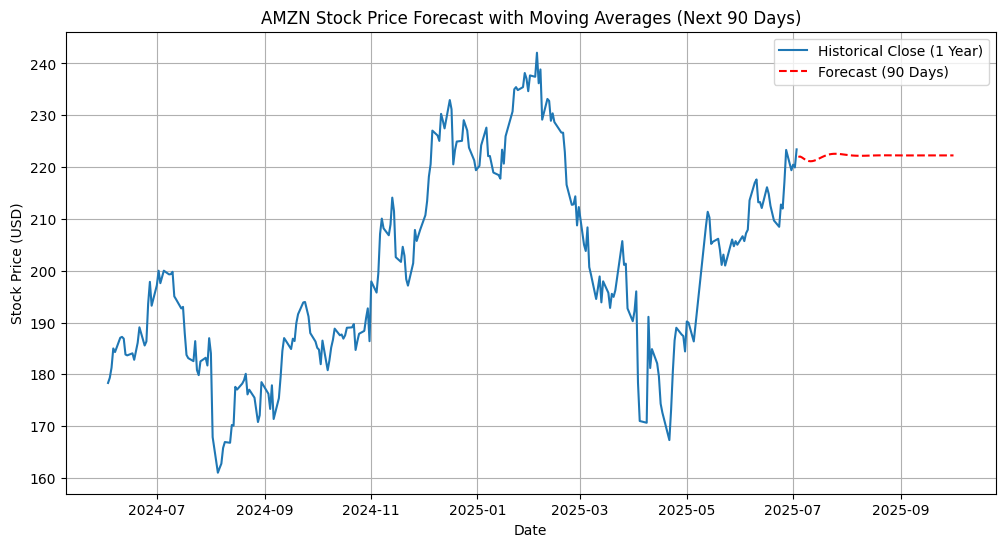

In [10]:
# ==========================
# LSTM Stock Price Forecasting (Future Prediction)
# Using Close + MA7 + MA14 (Moving Averages)
# ==========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==========================
# 1. Load & preprocess
# ==========================

# Load dataset
df = pd.read_csv("Dataset.csv")

# Select your stock (MSFT)
stock_data = df[df['Ticker'] == 'AMZN'].copy()

# Convert 'Date' to datetime and remove timezone info
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True)
stock_data['Date'] = stock_data['Date'].dt.tz_localize(None)

# Sort by date
stock_data = stock_data.sort_values('Date')

# ==========================
# Use only data from July 2024 to July 2025 (+ buffer)
# ==========================
start_date = "2024-06-01"  # buffer for moving average calculation
end_date = "2025-07-31"
stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)].copy()

# ==========================
# Add Moving Averages safely
# ==========================
stock_data['MA7'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['MA14'] = stock_data['Close'].rolling(window=14, min_periods=1).mean()

# Check how much data remains
print(f"Using data from {stock_data['Date'].min().date()} to {stock_data['Date'].max().date()}")
print(f"Total records available: {len(stock_data)}")

if len(stock_data) < 50:
    raise ValueError("Not enough data points in the selected date range. Try expanding the date window.")

# ==========================
# 2. Prepare features & scaling
# ==========================
# Select features (Close, MA7, MA14)
features = stock_data[['Close', 'MA7', 'MA14']].values

# Scale features to 0–1 range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)

# ==========================
# 3. Create training sequences
# ==========================
def create_sequences_multifeature(data, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, :])  # input = all features
        y.append(data[i, 0])                 # target = 'Close'
    return np.array(X), np.array(y)

time_steps = 30  # lookback window
X_train, y_train = create_sequences_multifeature(scaled_data, time_steps)

print(f"Training shape: X={X_train.shape}, y={y_train.shape}")

# ==========================
# 4. Build Model
# ==========================
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ==========================
# 5. Train Model
# ==========================
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

# ==========================
# 6. Future Prediction (Next N Days)
# ==========================
future_days = 90
last_sequence = scaled_data[-time_steps:]  # last 30 time steps (all features)

predictions_scaled = []

for _ in range(future_days):
    X_input = last_sequence.reshape((1, time_steps, scaled_data.shape[1]))
    pred = model.predict(X_input, verbose=0)
    predictions_scaled.append(pred[0, 0])

    # For future timesteps, approximate MA7/MA14 from last known ratios
    new_row = last_sequence[-1].copy()
    new_row[0] = pred[0, 0]  # replace Close with predicted value
    last_sequence = np.vstack((last_sequence[1:], new_row))

# Inverse transform predictions
dummy_pad = np.zeros((len(predictions_scaled), scaled_data.shape[1]))
dummy_pad[:, 0] = predictions_scaled  # only Close column used
predictions = scaler.inverse_transform(dummy_pad)[:, 0].reshape(-1, 1)

# ==========================
# 7. Visualization
# ==========================
# Create future date range
last_date = stock_data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'].values, label='Historical Close (1 Year)')
plt.plot(future_dates, predictions, color='red', linestyle='--', label=f'Forecast ({future_days} Days)')
plt.title(f"AMZN Stock Price Forecast with Moving Averages (Next {future_days} Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

Using data from 2024-06-03 to 2025-07-03
Total records available: 326
Training shape: X=(296, 30, 3), y=(296,)
Epoch 1/100


c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0399
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0160
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0137
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0160
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0116
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0102
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0097
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0091
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0085
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0084
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0072
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0072
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0072
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0069
E

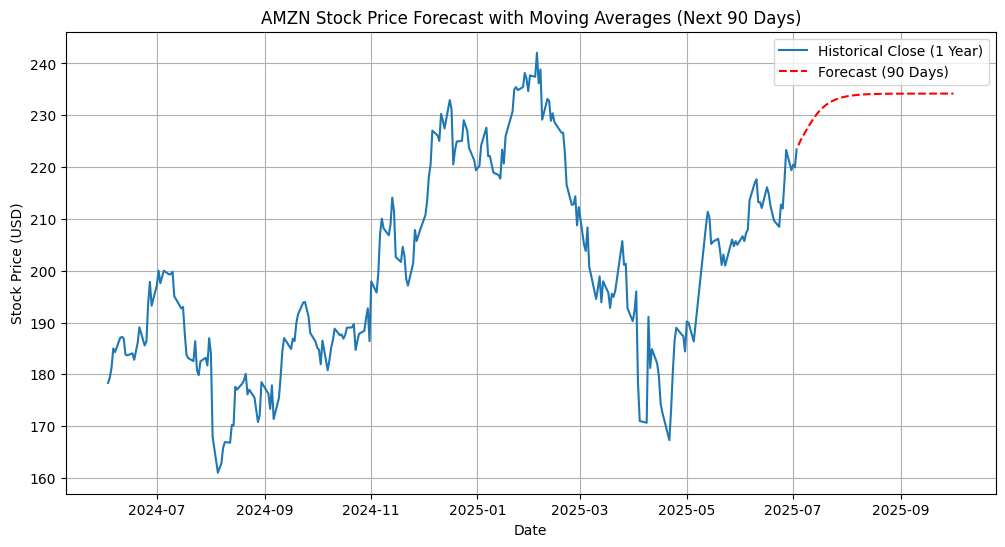

In [3]:
# ==========================
# LSTM Stock Price Forecasting (Future Prediction)
# Using Close + MA7 + MA14 (Moving Averages)
# ==========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==========================
# 1. Load & preprocess
# ==========================

# Load dataset
df = pd.read_csv("Dataset.csv")

# Select your stock (MSFT)
stock_data = df[df['Ticker'] == 'AMZN'].copy()

# Convert 'Date' to datetime and remove timezone info
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True)
stock_data['Date'] = stock_data['Date'].dt.tz_localize(None)

# Sort by date
stock_data = stock_data.sort_values('Date')

# ==========================
# Use only data from July 2024 to July 2025 (+ buffer)
# ==========================
start_date = "2024-06-01"  # buffer for moving average calculation
end_date = "2025-07-31"
stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)].copy()

# ==========================
# Add Moving Averages safely
# ==========================
stock_data['MA7'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['MA14'] = stock_data['Close'].rolling(window=14, min_periods=1).mean()

# Check how much data remains
print(f"Using data from {stock_data['Date'].min().date()} to {stock_data['Date'].max().date()}")
print(f"Total records available: {len(stock_data)}")

if len(stock_data) < 50:
    raise ValueError("Not enough data points in the selected date range. Try expanding the date window.")

# ==========================
# 2. Prepare features & scaling
# ==========================
# Select features (Close, MA7, MA14)
features = stock_data[['Close', 'MA7', 'MA14']].values

# Scale features to 0–1 range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)

# ==========================
# 3. Create training sequences
# ==========================
def create_sequences_multifeature(data, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, :])  # input = all features
        y.append(data[i, 0])                 # target = 'Close'
    return np.array(X), np.array(y)

time_steps = 30  # lookback window
X_train, y_train = create_sequences_multifeature(scaled_data, time_steps)

print(f"Training shape: X={X_train.shape}, y={y_train.shape}")

# ==========================
# 4. Build Model
# ==========================
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ==========================
# 5. Train Model
# ==========================
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

# ==========================
# 6. Future Prediction (Next N Days)
# ==========================
future_days = 90
last_sequence = scaled_data[-time_steps:]  # last 30 time steps (all features)

predictions_scaled = []

for _ in range(future_days):
    X_input = last_sequence.reshape((1, time_steps, scaled_data.shape[1]))
    pred = model.predict(X_input, verbose=0)
    predictions_scaled.append(pred[0, 0])

    # For future timesteps, approximate MA7/MA14 from last known ratios
    new_row = last_sequence[-1].copy()
    new_row[0] = pred[0, 0]  # replace Close with predicted value
    last_sequence = np.vstack((last_sequence[1:], new_row))

# Inverse transform predictions
dummy_pad = np.zeros((len(predictions_scaled), scaled_data.shape[1]))
dummy_pad[:, 0] = predictions_scaled  # only Close column used
predictions = scaler.inverse_transform(dummy_pad)[:, 0].reshape(-1, 1)

# ==========================
# 7. Visualization
# ==========================
# Create future date range
last_date = stock_data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'].values, label='Historical Close (1 Year)')
plt.plot(future_dates, predictions, color='red', linestyle='--', label=f'Forecast ({future_days} Days)')
plt.title(f"AMZN Stock Price Forecast with Moving Averages (Next {future_days} Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

Using data from 2024-06-03 to 2025-07-03
Total records available: 326
Training shape: X=(296, 30, 3), y=(296,)
Epoch 1/100


c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0290
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0120
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0107
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0105
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0093
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0088
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0092
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0081
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0086
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0080
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0091
Epoch 12/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0069
Epoch 13/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0071
Epoch 14/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0070
Epoch 15/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0067
E

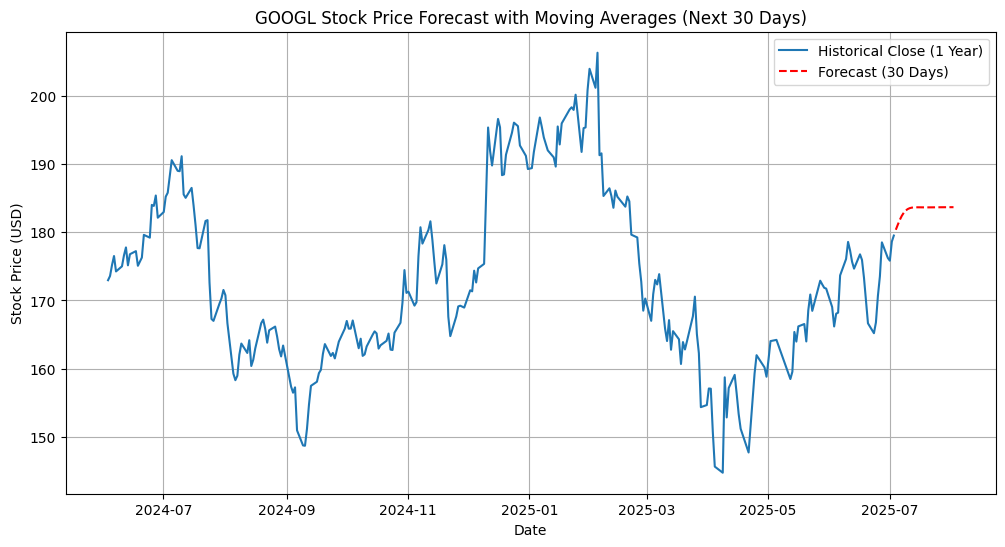

In [8]:
# ==========================
# LSTM Stock Price Forecasting (Future Prediction)
# Using Close + MA7 + MA14 (Moving Averages)
# ==========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==========================
# 1. Load & preprocess
# ==========================

# Load dataset
df = pd.read_csv("Dataset.csv")

# Select your stock (MSFT)
stock_data = df[df['Ticker'] == 'GOOGL'].copy()

# Convert 'Date' to datetime and remove timezone info
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True)
stock_data['Date'] = stock_data['Date'].dt.tz_localize(None)

# Sort by date
stock_data = stock_data.sort_values('Date')

# ==========================
# Use only data from July 2024 to July 2025 (+ buffer)
# ==========================
start_date = "2024-06-01"  # buffer for moving average calculation
end_date = "2025-07-31"
stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)].copy()

# ==========================
# Add Moving Averages safely
# ==========================
stock_data['MA7'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['MA14'] = stock_data['Close'].rolling(window=14, min_periods=1).mean()

# Check how much data remains
print(f"Using data from {stock_data['Date'].min().date()} to {stock_data['Date'].max().date()}")
print(f"Total records available: {len(stock_data)}")

if len(stock_data) < 50:
    raise ValueError("Not enough data points in the selected date range. Try expanding the date window.")

# ==========================
# 2. Prepare features & scaling
# ==========================
# Select features (Close, MA7, MA14)
features = stock_data[['Close', 'MA7', 'MA14']].values

# Scale features to 0–1 range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)

# ==========================
# 3. Create training sequences
# ==========================
def create_sequences_multifeature(data, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, :])  # input = all features
        y.append(data[i, 0])                 # target = 'Close'
    return np.array(X), np.array(y)

time_steps = 30  # lookback window
X_train, y_train = create_sequences_multifeature(scaled_data, time_steps)

print(f"Training shape: X={X_train.shape}, y={y_train.shape}")

# ==========================
# 4. Build Model
# ==========================
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ==========================
# 5. Train Model
# ==========================
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=7,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

# ==========================
# 6. Future Prediction (Next N Days)
# ==========================
future_days = 30
last_sequence = scaled_data[-time_steps:]  # last 30 time steps (all features)

predictions_scaled = []

for _ in range(future_days):
    X_input = last_sequence.reshape((1, time_steps, scaled_data.shape[1]))
    pred = model.predict(X_input, verbose=0)
    predictions_scaled.append(pred[0, 0])

    # For future timesteps, approximate MA7/MA14 from last known ratios
    new_row = last_sequence[-1].copy()
    new_row[0] = pred[0, 0]  # replace Close with predicted value
    last_sequence = np.vstack((last_sequence[1:], new_row))

# Inverse transform predictions
dummy_pad = np.zeros((len(predictions_scaled), scaled_data.shape[1]))
dummy_pad[:, 0] = predictions_scaled  # only Close column used
predictions = scaler.inverse_transform(dummy_pad)[:, 0].reshape(-1, 1)

# ==========================
# 7. Visualization
# ==========================
# Create future date range
last_date = stock_data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'].values, label='Historical Close (1 Year)')
plt.plot(future_dates, predictions, color='red', linestyle='--', label=f'Forecast ({future_days} Days)')
plt.title(f"GOOGL Stock Price Forecast with Moving Averages (Next {future_days} Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

Using data from 2024-06-03 to 2025-07-03
Total records available: 326
Training shape: X=(296, 30, 3), y=(296,)
Epoch 1/100


c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0406
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0160
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0128
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0121
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0105
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0090
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0105
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0109
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0079
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0072
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0075
Epoch 12/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0065
Epoch 13/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0067
Epoch 14/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0062
Epoch 15/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0074
E

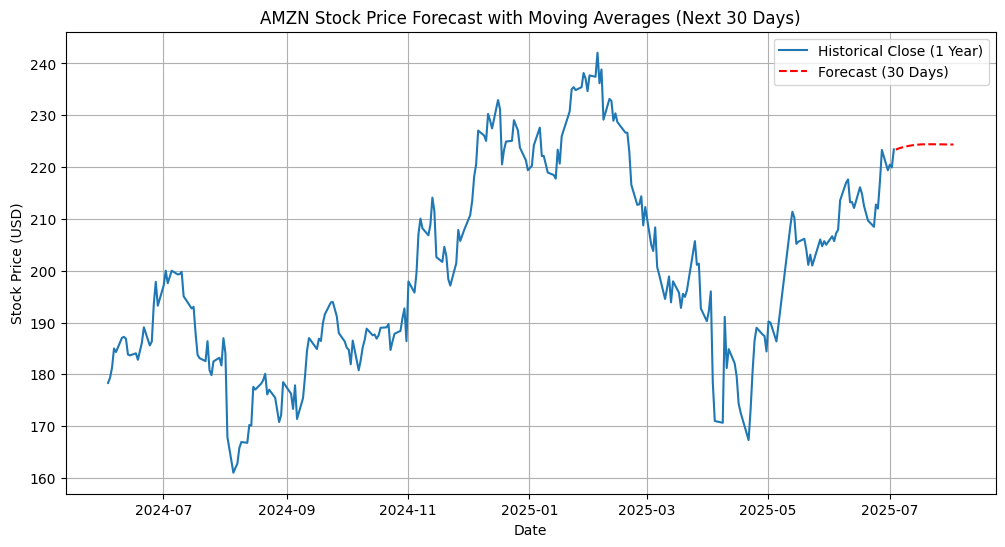

In [10]:
# ==========================
# LSTM Stock Price Forecasting (Future Prediction)
# Using Close + MA7 + MA14 (Moving Averages)
# ==========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==========================
# 1. Load & preprocess
# ==========================

# Load dataset
df = pd.read_csv("Dataset.csv")

# Select your stock (MSFT)
stock_data = df[df['Ticker'] == 'AMZN'].copy()

# Convert 'Date' to datetime and remove timezone info
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True)
stock_data['Date'] = stock_data['Date'].dt.tz_localize(None)

# Sort by date
stock_data = stock_data.sort_values('Date')

# ==========================
# Use only data from July 2024 to July 2025 (+ buffer)
# ==========================
start_date = "2024-06-01"  # buffer for moving average calculation
end_date = "2025-07-31"
stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)].copy()

# ==========================
# Add Moving Averages safely
# ==========================
stock_data['MA7'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['MA14'] = stock_data['Close'].rolling(window=14, min_periods=1).mean()

# Check how much data remains
print(f"Using data from {stock_data['Date'].min().date()} to {stock_data['Date'].max().date()}")
print(f"Total records available: {len(stock_data)}")

if len(stock_data) < 50:
    raise ValueError("Not enough data points in the selected date range. Try expanding the date window.")

# ==========================
# 2. Prepare features & scaling
# ==========================
# Select features (Close, MA7, MA14)
features = stock_data[['Close', 'MA7', 'MA14']].values

# Scale features to 0–1 range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)

# ==========================
# 3. Create training sequences
# ==========================
def create_sequences_multifeature(data, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, :])  # input = all features
        y.append(data[i, 0])                 # target = 'Close'
    return np.array(X), np.array(y)

time_steps = 30  # lookback window
X_train, y_train = create_sequences_multifeature(scaled_data, time_steps)

print(f"Training shape: X={X_train.shape}, y={y_train.shape}")

# ==========================
# 4. Build Model
# ==========================
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ==========================
# 5. Train Model
# ==========================
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=7,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

# ==========================
# 6. Future Prediction (Next N Days)
# ==========================
future_days = 30
last_sequence = scaled_data[-time_steps:]  # last 30 time steps (all features)

predictions_scaled = []

for _ in range(future_days):
    X_input = last_sequence.reshape((1, time_steps, scaled_data.shape[1]))
    pred = model.predict(X_input, verbose=0)
    predictions_scaled.append(pred[0, 0])

    # For future timesteps, approximate MA7/MA14 from last known ratios
    new_row = last_sequence[-1].copy()
    new_row[0] = pred[0, 0]  # replace Close with predicted value
    last_sequence = np.vstack((last_sequence[1:], new_row))

# Inverse transform predictions
dummy_pad = np.zeros((len(predictions_scaled), scaled_data.shape[1]))
dummy_pad[:, 0] = predictions_scaled  # only Close column used
predictions = scaler.inverse_transform(dummy_pad)[:, 0].reshape(-1, 1)

# ==========================
# 7. Visualization
# ==========================
# Create future date range
last_date = stock_data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'].values, label='Historical Close (1 Year)')
plt.plot(future_dates, predictions, color='red', linestyle='--', label=f'Forecast ({future_days} Days)')
plt.title(f"AMZN Stock Price Forecast with Moving Averages (Next {future_days} Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

Using data from 2024-06-03 to 2025-07-03
Total records available: 326
Training shape: X=(296, 30, 3), y=(296,)
Epoch 1/100


c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0421
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0145
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0116
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0110
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0076
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0070
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0077
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0067
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0059
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0061
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0056
Epoch 12/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0048
Epoch 13/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0046
Epoch 14/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0044
Epoch 15/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0038
E

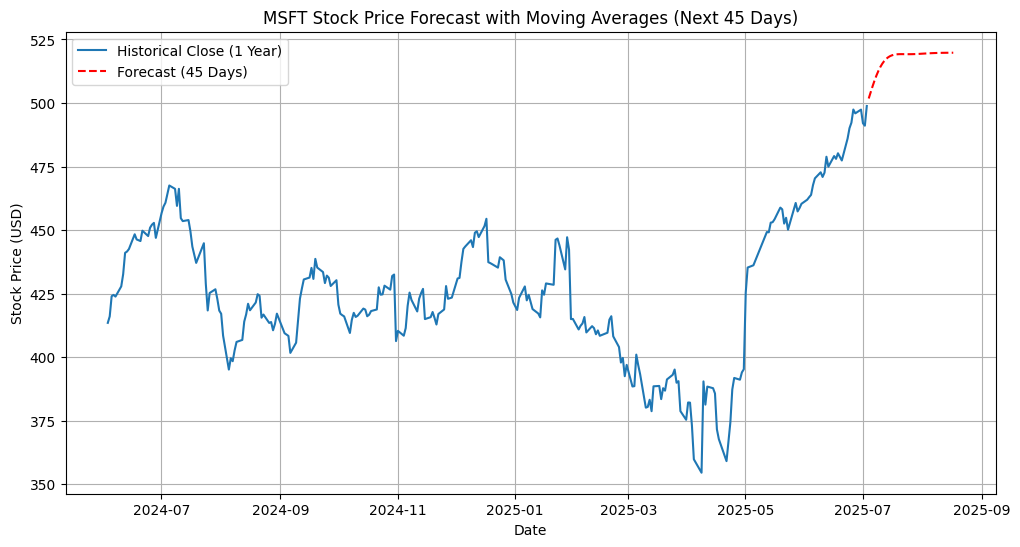

In [15]:
# ==========================
# LSTM Stock Price Forecasting (Future Prediction)
# Using Close + MA7 + MA14 (Moving Averages)
# ==========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==========================
# 1. Load & preprocess
# ==========================

# Load dataset
df = pd.read_csv("Dataset.csv")

# Select your stock (MSFT)
stock_data = df[df['Ticker'] == 'MSFT'].copy()

# Convert 'Date' to datetime and remove timezone info
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True)
stock_data['Date'] = stock_data['Date'].dt.tz_localize(None)

# Sort by date
stock_data = stock_data.sort_values('Date')

# ==========================
# Use only data from July 2024 to July 2025 (+ buffer)
# ==========================
start_date = "2024-06-01"  # buffer for moving average calculation
end_date = "2025-07-31"
stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)].copy()

# ==========================
# Add Moving Averages safely
# ==========================
stock_data['MA7'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['MA14'] = stock_data['Close'].rolling(window=14, min_periods=1).mean()

# Check how much data remains
print(f"Using data from {stock_data['Date'].min().date()} to {stock_data['Date'].max().date()}")
print(f"Total records available: {len(stock_data)}")

if len(stock_data) < 50:
    raise ValueError("Not enough data points in the selected date range. Try expanding the date window.")

# ==========================
# 2. Prepare features & scaling
# ==========================
# Select features (Close, MA7, MA14)
features = stock_data[['Close', 'MA7', 'MA14']].values

# Scale features to 0–1 range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)

# ==========================
# 3. Create training sequences
# ==========================
def create_sequences_multifeature(data, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, :])  # input = all features
        y.append(data[i, 0])                 # target = 'Close'
    return np.array(X), np.array(y)

time_steps = 30  # lookback window
X_train, y_train = create_sequences_multifeature(scaled_data, time_steps)

print(f"Training shape: X={X_train.shape}, y={y_train.shape}")

# ==========================
# 4. Build Model
# ==========================
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.1),
    LSTM(100, return_sequences=False),
    Dropout(0.1),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# ==========================
# 5. Train Model
# ==========================
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=7,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

# ==========================
# 6. Future Prediction (Next N Days)
# ==========================
future_days = 45
last_sequence = scaled_data[-time_steps:]  # last 30 time steps (all features)

predictions_scaled = []

for _ in range(future_days):
    X_input = last_sequence.reshape((1, time_steps, scaled_data.shape[1]))
    pred = model.predict(X_input, verbose=0)
    predictions_scaled.append(pred[0, 0])

    # For future timesteps, approximate MA7/MA14 from last known ratios
    new_row = last_sequence[-1].copy()
    new_row[0] = pred[0, 0]  # replace Close with predicted value
    last_sequence = np.vstack((last_sequence[1:], new_row))

# Inverse transform predictions
dummy_pad = np.zeros((len(predictions_scaled), scaled_data.shape[1]))
dummy_pad[:, 0] = predictions_scaled  # only Close column used
predictions = scaler.inverse_transform(dummy_pad)[:, 0].reshape(-1, 1)

# ==========================
# 7. Visualization
# ==========================
# Create future date range
last_date = stock_data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'].values, label='Historical Close (1 Year)')
plt.plot(future_dates, predictions, color='red', linestyle='--', label=f'Forecast ({future_days} Days)')
plt.title(f"MSFT Stock Price Forecast with Moving Averages (Next {future_days} Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

Data range: 2024-06-03 to 2025-07-03
Total rows: 326
Train samples: 236, Test samples: 60


c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - loss: 0.0371 - val_loss: 0.0125
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0155 - val_loss: 0.0070
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0118 - val_loss: 0.0140
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0099 - val_loss: 0.0058
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0081 - val_loss: 0.0093
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0076 - val_loss: 0.0051
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0061 - val_loss: 0.0055
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0059 - val_loss: 0.0040
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0078 - val_loss: 0.0045
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0069 - val_loss: 0.0106
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0061 - val_loss: 0.0044
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/ste

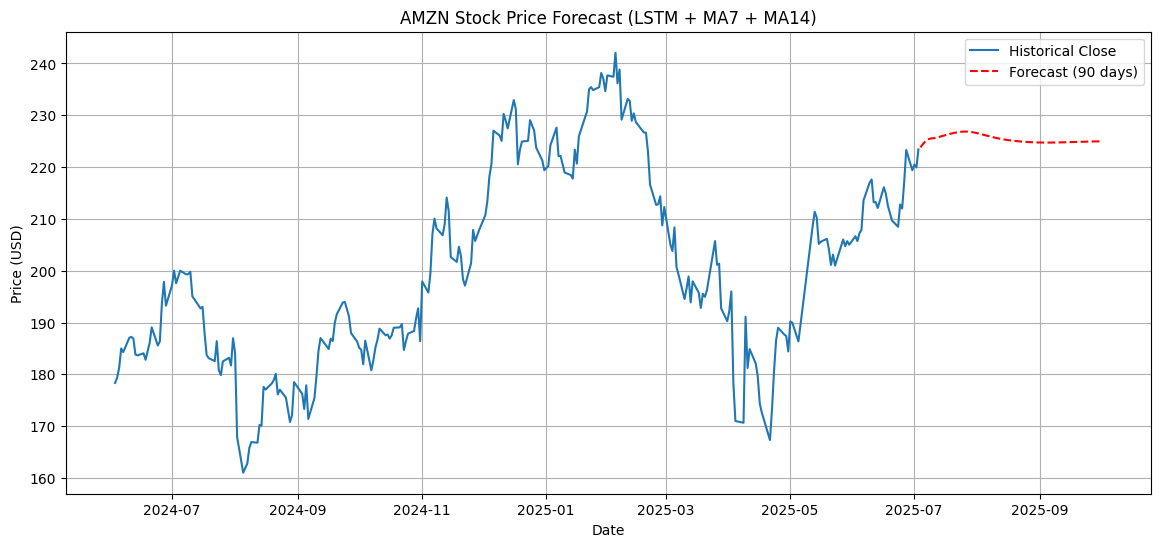

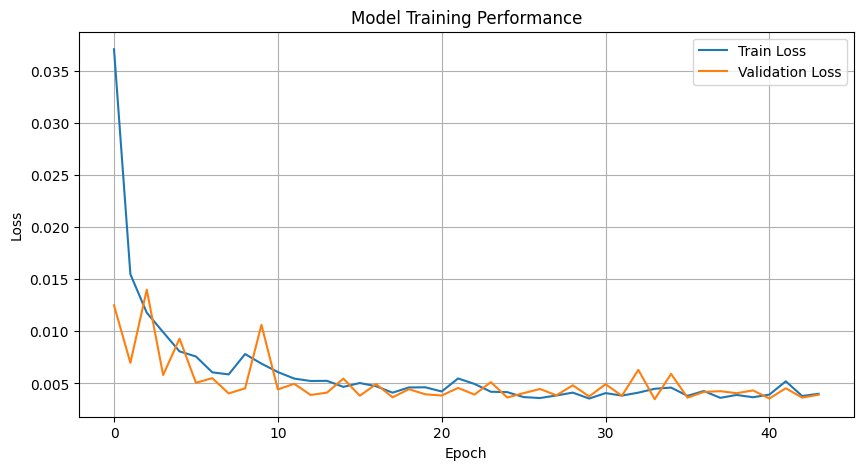

In [16]:
# =============================================
# LSTM Stock Forecasting (Full Upgrade: A + B + C)
# Features: Close, MA7, MA14
# Improvements:
#   ✔ Accurate future MA7/MA14 computation (no approximations)
#   ✔ Train/Test split + validation
#   ✔ Stronger LSTM architecture (Bidirectional + Dropout)
# =============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf


# =============================================
# 1. Load & Preprocess Data
# =============================================

df = pd.read_csv("Dataset.csv")
stock_data = df[df['Ticker'] == 'AMZN'].copy()

stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True)
stock_data['Date'] = stock_data['Date'].dt.tz_localize(None)
stock_data = stock_data.sort_values('Date')

# Restrict to past year
start_date = "2024-06-01"
end_date = "2025-07-31"
stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)].copy()

# Add moving averages
stock_data['MA7'] = stock_data['Close'].rolling(7, min_periods=1).mean()
stock_data['MA14'] = stock_data['Close'].rolling(14, min_periods=1).mean()

print("Data range:", stock_data['Date'].min().date(), "to", stock_data['Date'].max().date())
print("Total rows:", len(stock_data))

if len(stock_data) < 60:
    raise ValueError("Not enough data. Increase date range.")


# =============================================
# 2. Feature Scaling
# =============================================

features = stock_data[['Close', 'MA7', 'MA14']].values

scaler = MinMaxScaler()
scaled = scaler.fit_transform(features)


# =============================================
# 3. Create Sequences (for Train/Test)
# =============================================

def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i, 0])  # target = Close
    return np.array(X), np.array(y)

TIME_STEPS = 30
X, y = create_sequences(scaled, TIME_STEPS)

# Train/Test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")


# =============================================
# 4. Build Improved LSTM Model
# =============================================

model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(TIME_STEPS, 3)),
    Dropout(0.3),

    LSTM(128, return_sequences=False),
    Dropout(0.3),

    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")

# Save best model
checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss", mode="min")

early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)


# =============================================
# 5. Train the Model
# =============================================

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, early_stop],
    verbose=1
)


# =============================================
# 6. Predict Future 90 Days (Accurate MA logic)
# =============================================

future_days = 90

# We will build future predictions in real (unscaled) space to compute MA correctly
full_close = list(stock_data['Close'].values)

# Predict using scaled data
last_seq = scaled[-TIME_STEPS:].copy()

scaled_predictions = []

for _ in range(future_days):

    # Predict next close (scaled)
    X_input = last_seq.reshape(1, TIME_STEPS, 3)
    pred_scaled = model.predict(X_input, verbose=0)[0][0]

    scaled_predictions.append(pred_scaled)

    # Convert scaled prediction to actual price
    dummy = np.zeros((1, 3))
    dummy[0][0] = pred_scaled
    pred_real = scaler.inverse_transform(dummy)[0][0]

    # Append real price to full_close
    full_close.append(pred_real)

    # Recompute MA7 & MA14 from REAL prices
    ma7 = np.mean(full_close[-7:])
    ma14 = np.mean(full_close[-14:])

    # Scale new feature row
    new_row_real = np.array([[pred_real, ma7, ma14]])
    new_row_scaled = scaler.transform(new_row_real)[0]

    # Append to sequence window
    last_seq = np.vstack([last_seq[1:], new_row_scaled])


# Convert prediction list into real prices
dummy = np.zeros((future_days, 3))
dummy[:, 0] = scaled_predictions
future_predictions = scaler.inverse_transform(dummy)[:, 0]


# =============================================
# 7. Plot Results
# =============================================

future_dates = pd.date_range(
    start=stock_data['Date'].iloc[-1] + pd.Timedelta(days=1),
    periods=future_days
)

plt.figure(figsize=(14, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label="Historical Close")
plt.plot(future_dates, future_predictions, "--r", label="Forecast (90 days)")

plt.title("AMZN Stock Price Forecast (LSTM + MA7 + MA14)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


# =============================================
# 8. Plot Train vs Validation Loss
# =============================================

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Training Performance")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

sample

Data range: 2024-06-03 to 2025-07-03
Total rows: 326
Train samples: 236, Test samples: 60
Epoch 1/100


c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0564 - val_loss: 0.0079
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0188 - val_loss: 0.0079
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0129 - val_loss: 0.0081
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0118 - val_loss: 0.0158
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0095 - val_loss: 0.0058
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0107 - val_loss: 0.0121
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0092 - val_loss: 0.0060
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0064 - val_loss: 0.0064
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0054 - val_loss: 0.0077
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0080 - val_loss: 0.0114
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0

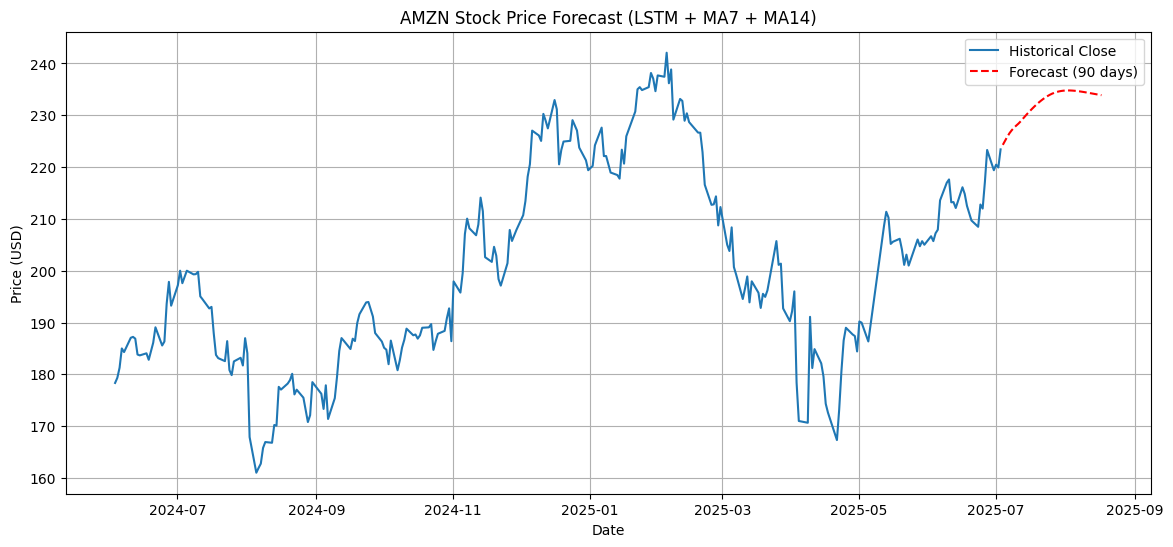

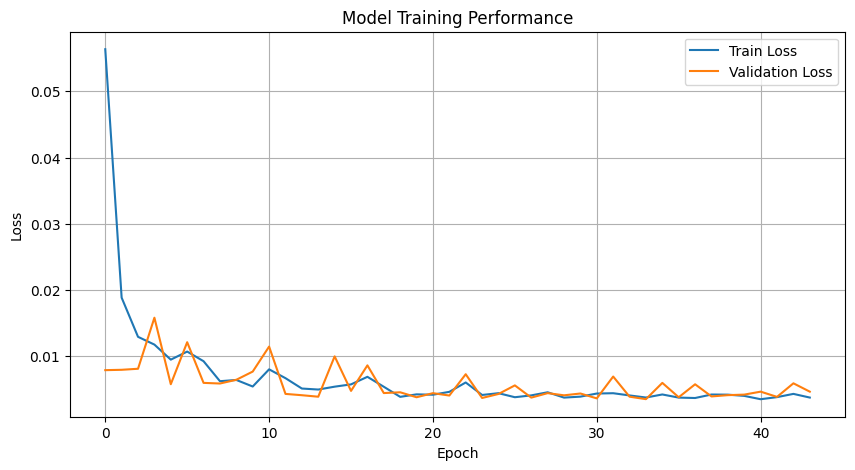

In [18]:
# =============================================
# LSTM Stock Forecasting (Full Upgrade: A + B + C)
# Features: Close, MA7, MA14
# Improvements:
#   ✔ Accurate future MA7/MA14 computation (no approximations)
#   ✔ Train/Test split + validation
#   ✔ Stronger LSTM architecture (Bidirectional + Dropout)
# =============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf


# =============================================
# 1. Load & Preprocess Data
# =============================================

df = pd.read_csv("Dataset.csv")
stock_data = df[df['Ticker'] == 'AMZN'].copy()

stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True)
stock_data['Date'] = stock_data['Date'].dt.tz_localize(None)
stock_data = stock_data.sort_values('Date')

# Restrict to past year
start_date = "2024-06-01"
end_date = "2025-07-31"
stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)].copy()

# Add moving averages
stock_data['MA7'] = stock_data['Close'].rolling(7, min_periods=1).mean()
stock_data['MA14'] = stock_data['Close'].rolling(14, min_periods=1).mean()

print("Data range:", stock_data['Date'].min().date(), "to", stock_data['Date'].max().date())
print("Total rows:", len(stock_data))

if len(stock_data) < 60:
    raise ValueError("Not enough data. Increase date range.")


# =============================================
# 2. Feature Scaling
# =============================================

features = stock_data[['Close', 'MA7', 'MA14']].values

scaler = MinMaxScaler()
scaled = scaler.fit_transform(features)


# =============================================
# 3. Create Sequences (for Train/Test)
# =============================================

def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i, 0])  # target = Close
    return np.array(X), np.array(y)

TIME_STEPS = 30
X, y = create_sequences(scaled, TIME_STEPS)

# Train/Test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")


# =============================================
# 4. Build Improved LSTM Model
# =============================================

model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(TIME_STEPS, 3)),
    Dropout(0.3),

    LSTM(128, return_sequences=False),
    Dropout(0.3),

    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")

# Save best model
checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss", mode="min")

early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)


# =============================================
# 5. Train the Model
# =============================================

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, early_stop],
    verbose=1
)


# =============================================
# 6. Predict Future 90 Days (Accurate MA logic)
# =============================================

future_days = 45

# We will build future predictions in real (unscaled) space to compute MA correctly
full_close = list(stock_data['Close'].values)

# Predict using scaled data
last_seq = scaled[-TIME_STEPS:].copy()

scaled_predictions = []

for _ in range(future_days):

    # Predict next close (scaled)
    X_input = last_seq.reshape(1, TIME_STEPS, 3)
    pred_scaled = model.predict(X_input, verbose=0)[0][0]

    scaled_predictions.append(pred_scaled)

    # Convert scaled prediction to actual price
    dummy = np.zeros((1, 3))
    dummy[0][0] = pred_scaled
    pred_real = scaler.inverse_transform(dummy)[0][0]

    # Append real price to full_close
    full_close.append(pred_real)

    # Recompute MA7 & MA14 from REAL prices
    ma7 = np.mean(full_close[-7:])
    ma14 = np.mean(full_close[-14:])

    # Scale new feature row
    new_row_real = np.array([[pred_real, ma7, ma14]])
    new_row_scaled = scaler.transform(new_row_real)[0]

    # Append to sequence window
    last_seq = np.vstack([last_seq[1:], new_row_scaled])


# Convert prediction list into real prices
dummy = np.zeros((future_days, 3))
dummy[:, 0] = scaled_predictions
future_predictions = scaler.inverse_transform(dummy)[:, 0]


# =============================================
# 7. Plot Results
# =============================================

future_dates = pd.date_range(
    start=stock_data['Date'].iloc[-1] + pd.Timedelta(days=1),
    periods=future_days
)

plt.figure(figsize=(14, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label="Historical Close")
plt.plot(future_dates, future_predictions, "--r", label="Forecast (90 days)")

plt.title("AMZN Stock Price Forecast (LSTM + MA7 + MA14)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


# =============================================
# 8. Plot Train vs Validation Loss
# =============================================

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Training Performance")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

RSI + MACD

Epoch 1/100


c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 0.0471 - val_loss: 0.0177
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0219 - val_loss: 0.0082
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0116 - val_loss: 0.0105
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0111 - val_loss: 0.0239
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0121 - val_loss: 0.0062
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0085 - val_loss: 0.0115
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0078 - val_loss: 0.0084
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0077 - val_loss: 0.0067
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0067 - val_loss: 0.0051
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0078 - val_loss: 0.0143
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0075 - val_loss: 0.0063
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0

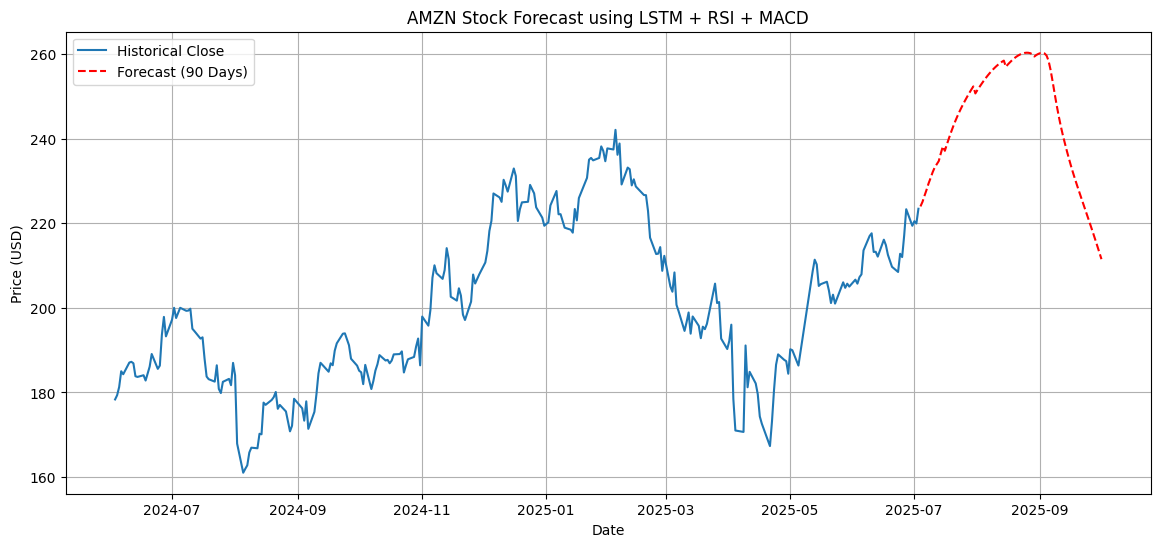

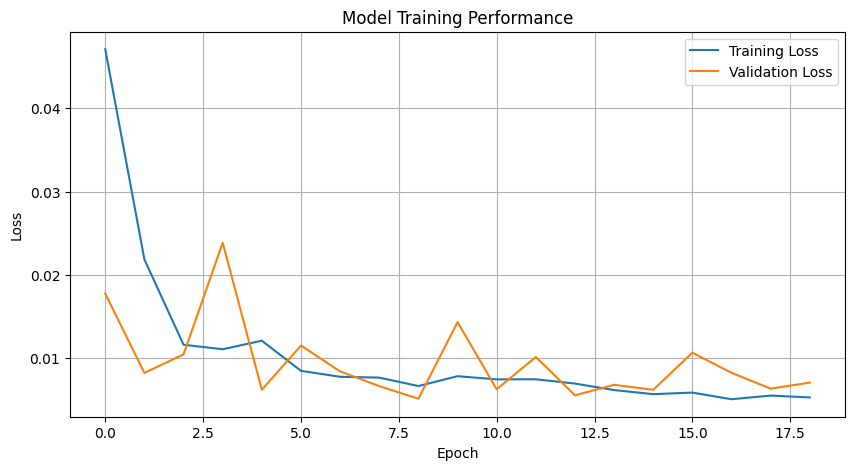

In [28]:
# ==========================================================
# LSTM Stock Forecasting with Indicators (RSI + MACD)
# Full Upgrade A + B + C
# Dataset Columns:
# Date,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,
# Country,Dividends,Stock Splits,Capital Gains
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# ==========================================================
# 1. Load & Filter Data
# ==========================================================

df = pd.read_csv("Dataset.csv")

# Filter for AMZN
stock_data = df[df["Ticker"] == "AMZN"].copy()

# Clean date
stock_data["Date"] = pd.to_datetime(stock_data["Date"], utc=True)
stock_data["Date"] = stock_data["Date"].dt.tz_localize(None)
stock_data = stock_data.sort_values("Date")

# Select timeframe
start_date = "2024-06-01"
end_date = "2025-07-31"
stock_data = stock_data[(stock_data["Date"] >= start_date) & (stock_data["Date"] <= end_date)].copy()

if len(stock_data) < 50:
    raise ValueError("Not enough samples in this date range!")


# ==========================================================
# 2. Compute Indicators (RSI + MACD) — NO ROWS REMOVED
# ==========================================================

# ----- RSI (14) -----
delta = stock_data["Close"].diff()

gain = delta.clip(lower=0).rolling(14).mean()
loss = -delta.clip(upper=0).rolling(14).mean()

rs = gain / loss
rsi = 100 - (100 / (1 + rs))

# Fill early NaNs with neutral RSI = 50
stock_data["RSI"] = rsi.fillna(50)


# ----- MACD (12 EMA - 26 EMA + signal) -----
EMA12 = stock_data["Close"].ewm(span=12, adjust=False).mean()
EMA26 = stock_data["Close"].ewm(span=26, adjust=False).mean()

macd = EMA12 - EMA26
signal = macd.ewm(span=9, adjust=False).mean()

# Fill MACD-related NaNs with zeros (neutral trend)
stock_data["MACD"] = macd.fillna(0)
stock_data["Signal"] = signal.fillna(0)

# ==========================================================
# 3. Prepare Features & Scaling
# ==========================================================

features = stock_data[["Close", "RSI", "MACD", "Signal"]].values

scaler = MinMaxScaler()
scaled = scaler.fit_transform(features)


def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i, 0])  # Predict Close
    return np.array(X), np.array(y)


TIME_STEPS = 30
X, y = create_sequences(scaled, TIME_STEPS)

# Train/Test split
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


# ==========================================================
# 4. Build Improved LSTM Model (Bidirectional + Dense Stack)
# ==========================================================

model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(TIME_STEPS, 4)),
    Dropout(0.3),

    LSTM(128),
    Dropout(0.3),

    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1)  # Predict single next Close value
])

model.compile(optimizer="adam", loss="mse")

checkpoint = ModelCheckpoint(
    "best_rsi_macd_model.keras",
    save_best_only=True,
    monitor="val_loss",
    mode="min"
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)


# ==========================================================
# 5. Train Model
# ==========================================================

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, early_stop],
    verbose=1
)


# ==========================================================
# 6. Future Forecasting (Recompute RSI + MACD Dynamically)
# ==========================================================

future_days = 90

# Starting point for indicators
full_close = list(stock_data["Close"].values)

# Last scaled sequence window
last_seq = scaled[-TIME_STEPS:].copy()

scaled_predictions = []

for _ in range(future_days):

    X_input = last_seq.reshape(1, TIME_STEPS, 4)
    pred_scaled = model.predict(X_input, verbose=0)[0][0]
    scaled_predictions.append(pred_scaled)

    # Convert scaled → real close price
    dummy = np.zeros((1, 4))
    dummy[0][0] = pred_scaled
    pred_real = scaler.inverse_transform(dummy)[0][0]

    # Append predicted value
    full_close.append(pred_real)

    # ---- Recompute Indicators on Predicted Data ----
    close_series = pd.Series(full_close)

    # RSI
    delta = close_series.diff()
    gain = delta.clip(lower=0).rolling(14).mean().iloc[-1]
    loss = -delta.clip(upper=0).rolling(14).mean().iloc[-1]
    rs = gain / loss if loss != 0 else 1
    rsi = 100 - (100 / (1 + rs))

    # MACD + Signal
    ema12 = close_series.ewm(span=12, adjust=False).mean().iloc[-1]
    ema26 = close_series.ewm(span=26, adjust=False).mean().iloc[-1]
    macd = ema12 - ema26
    signal = close_series.ewm(span=12, adjust=False).mean() \
             - close_series.ewm(span=26, adjust=False).mean()
    signal = signal.ewm(span=9, adjust=False).mean().iloc[-1]

    # Scale new feature row
    new_real = np.array([[pred_real, rsi, macd, signal]])
    new_scaled = scaler.transform(new_real)[0]

    # Slide the window
    last_seq = np.vstack([last_seq[1:], new_scaled])


# Convert predictions to real prices
dummy = np.zeros((future_days, 4))
dummy[:, 0] = scaled_predictions
future_predictions = scaler.inverse_transform(dummy)[:, 0]


# ==========================================================
# 7. Plot Forecast
# ==========================================================

future_dates = pd.date_range(
    start=stock_data["Date"].iloc[-1] + pd.Timedelta(days=1),
    periods=future_days
)

plt.figure(figsize=(14, 6))
plt.plot(stock_data["Date"], stock_data["Close"], label="Historical Close")
plt.plot(future_dates, future_predictions, "--r", label="Forecast (90 Days)")

plt.title("AMZN Stock Forecast using LSTM + RSI + MACD")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()


# ==========================================================
# 8. Plot Loss Curves
# ==========================================================

plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Training Performance")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - loss: 0.0373 - val_loss: 0.0077
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0140 - val_loss: 0.0096
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0119 - val_loss: 0.0274
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0137 - val_loss: 0.0113
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0116 - val_loss: 0.0096
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0109 - val_loss: 0.0042
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0077 - val_loss: 0.0085
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0070 - val_loss: 0.0107
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0068 - val_loss: 0.0076
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0075 - val_loss: 0.0153
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0066 - val_loss: 0.0083
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/ste

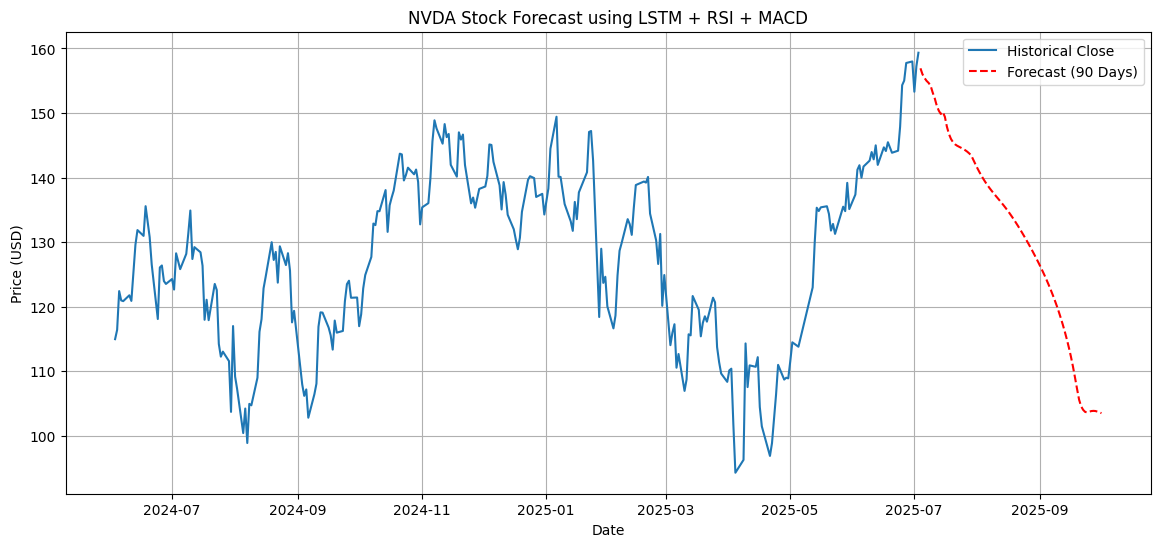

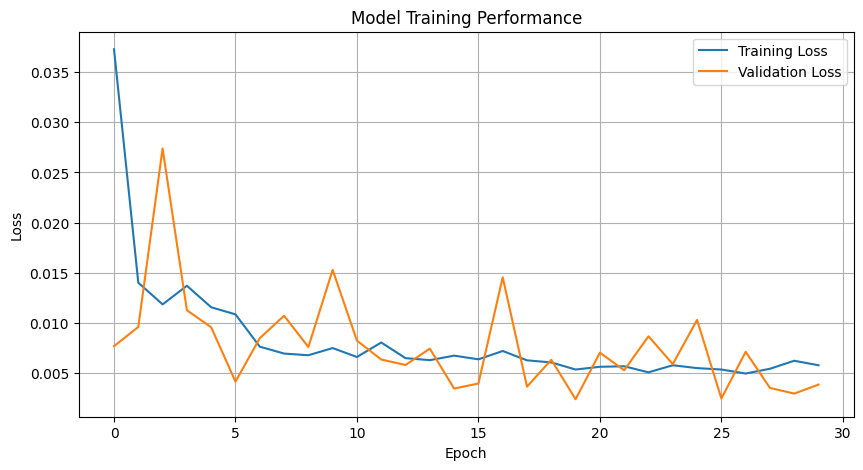

In [32]:
# ==========================================================
# LSTM Stock Forecasting with Indicators (RSI + MACD)
# Full Upgrade A + B + C
# Dataset Columns:
# Date,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,
# Country,Dividends,Stock Splits,Capital Gains
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# ==========================================================
# 1. Load & Filter Data
# ==========================================================

df = pd.read_csv("Dataset.csv")

# Filter for AMZN
stock_data = df[df["Ticker"] == "NVDA"].copy()

# Clean date
stock_data["Date"] = pd.to_datetime(stock_data["Date"], utc=True)
stock_data["Date"] = stock_data["Date"].dt.tz_localize(None)
stock_data = stock_data.sort_values("Date")

# Select timeframe
start_date = "2024-06-01"
end_date = "2025-07-31"
stock_data = stock_data[(stock_data["Date"] >= start_date) & (stock_data["Date"] <= end_date)].copy()

if len(stock_data) < 50:
    raise ValueError("Not enough samples in this date range!")


# ==========================================================
# 2. Compute Indicators (RSI + MACD) — NO ROWS REMOVED
# ==========================================================

# ----- RSI (14) -----
delta = stock_data["Close"].diff()

gain = delta.clip(lower=0).rolling(14).mean()
loss = -delta.clip(upper=0).rolling(14).mean()

rs = gain / loss
rsi = 100 - (100 / (1 + rs))

# Fill early NaNs with neutral RSI = 50
stock_data["RSI"] = rsi.fillna(50)


# ----- MACD (12 EMA - 26 EMA + signal) -----
EMA12 = stock_data["Close"].ewm(span=12, adjust=False).mean()
EMA26 = stock_data["Close"].ewm(span=26, adjust=False).mean()

macd = EMA12 - EMA26
signal = macd.ewm(span=9, adjust=False).mean()

# Fill MACD-related NaNs with zeros (neutral trend)
stock_data["MACD"] = macd.fillna(0)
stock_data["Signal"] = signal.fillna(0)

# ==========================================================
# 3. Prepare Features & Scaling
# ==========================================================

features = stock_data[["Close", "RSI", "MACD", "Signal"]].values

scaler = MinMaxScaler()
scaled = scaler.fit_transform(features)


def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i, 0])  # Predict Close
    return np.array(X), np.array(y)


TIME_STEPS = 30
X, y = create_sequences(scaled, TIME_STEPS)

# Train/Test split
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


# ==========================================================
# 4. Build Improved LSTM Model (Bidirectional + Dense Stack)
# ==========================================================

model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(TIME_STEPS, 4)),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1)  # Predict single next Close value
])

model.compile(optimizer="adam", loss="mse")

checkpoint = ModelCheckpoint(
    "best_rsi_macd_model.keras",
    save_best_only=True,
    monitor="val_loss",
    mode="min"
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)


# ==========================================================
# 5. Train Model
# ==========================================================

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=7,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, early_stop],
    verbose=1
)


# ==========================================================
# 6. Future Forecasting (Recompute RSI + MACD Dynamically)
# ==========================================================

future_days = 90

# Starting point for indicators
full_close = list(stock_data["Close"].values)

# Last scaled sequence window
last_seq = scaled[-TIME_STEPS:].copy()

scaled_predictions = []

for _ in range(future_days):

    X_input = last_seq.reshape(1, TIME_STEPS, 4)
    pred_scaled = model.predict(X_input, verbose=0)[0][0]
    scaled_predictions.append(pred_scaled)

    # Convert scaled → real close price
    dummy = np.zeros((1, 4))
    dummy[0][0] = pred_scaled
    pred_real = scaler.inverse_transform(dummy)[0][0]

    # Append predicted value
    full_close.append(pred_real)

    # ---- Recompute Indicators on Predicted Data ----
    close_series = pd.Series(full_close)

    # RSI
    delta = close_series.diff()
    gain = delta.clip(lower=0).rolling(14).mean().iloc[-1]
    loss = -delta.clip(upper=0).rolling(14).mean().iloc[-1]
    rs = gain / loss if loss != 0 else 1
    rsi = 100 - (100 / (1 + rs))

    # MACD + Signal
    ema12 = close_series.ewm(span=12, adjust=False).mean().iloc[-1]
    ema26 = close_series.ewm(span=26, adjust=False).mean().iloc[-1]
    macd = ema12 - ema26
    signal = close_series.ewm(span=12, adjust=False).mean() \
             - close_series.ewm(span=26, adjust=False).mean()
    signal = signal.ewm(span=9, adjust=False).mean().iloc[-1]

    # Scale new feature row
    new_real = np.array([[pred_real, rsi, macd, signal]])
    new_scaled = scaler.transform(new_real)[0]

    # Slide the window
    last_seq = np.vstack([last_seq[1:], new_scaled])


# Convert predictions to real prices
dummy = np.zeros((future_days, 4))
dummy[:, 0] = scaled_predictions
future_predictions = scaler.inverse_transform(dummy)[:, 0]


# ==========================================================
# 7. Plot Forecast
# ==========================================================

future_dates = pd.date_range(
    start=stock_data["Date"].iloc[-1] + pd.Timedelta(days=1),
    periods=future_days
)

plt.figure(figsize=(14, 6))
plt.plot(stock_data["Date"], stock_data["Close"], label="Historical Close")
plt.plot(future_dates, future_predictions, "--r", label="Forecast (90 Days)")

plt.title("NVDA Stock Forecast using LSTM + RSI + MACD")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()


# ==========================================================
# 8. Plot Loss Curves
# ==========================================================

plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Training Performance")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

Bollinger + Volume

Epoch 1/100


C:\Users\me\AppData\Local\Temp\ipykernel_14880\3101500897.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data["Volume"] = stock_data["Volume"].fillna(method="bfill").fillna(0)
c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0397 - val_loss: 0.0112
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - val_loss: 0.0194
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0089 - val_loss: 0.0073
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0071 - val_loss: 0.0096
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0071 - val_loss: 0.0084
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0068 - val_loss: 0.0074
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0064 - val_loss: 0.0114
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0055 - val_loss: 0.0078
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0057 - val_loss: 0.0070
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0068 - val_loss: 0.0128
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0055 - val_loss: 0.0089
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0

c:\Users\me\test-practice-others\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\me\test-practice-others\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\me\test-practice-others\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\me\test-practice-others\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\me\test-practice-others\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with featur

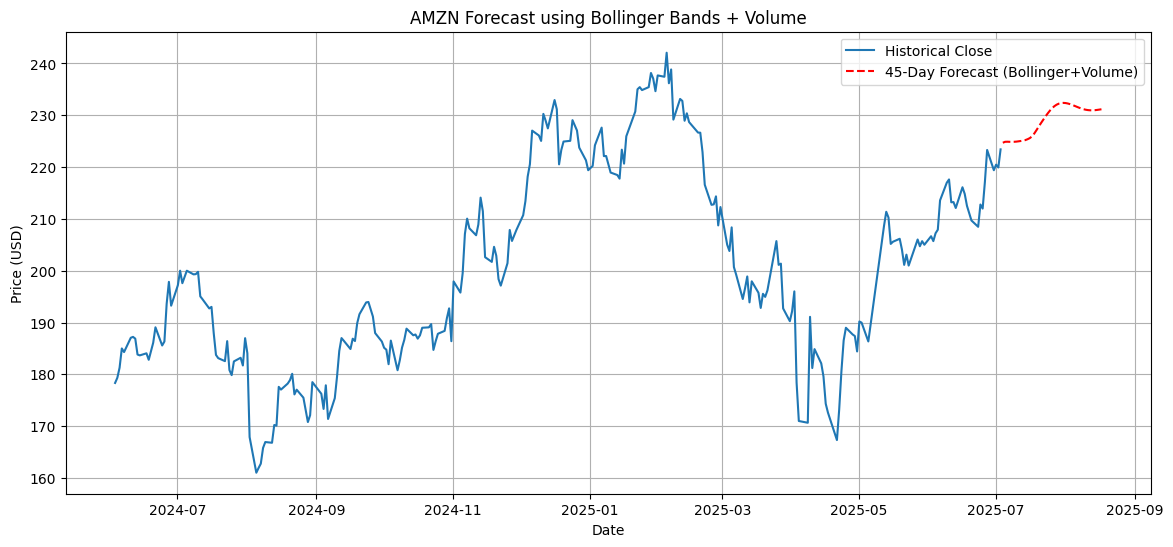

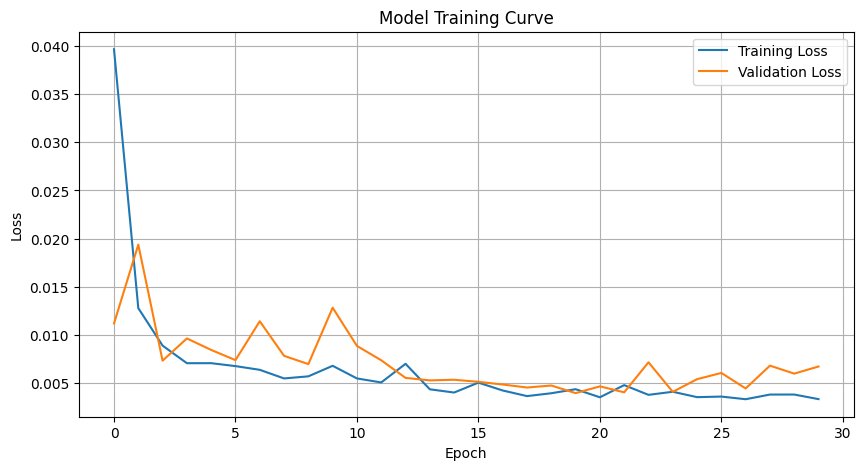

In [42]:
# ==========================================================
# LSTM Stock Forecasting with Bollinger Bands + Volume (CORRECTED)
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ==========================================================
# 1. Load and Filter Dataset
# ==========================================================

df = pd.read_csv("Dataset.csv")

# Filter AMZN
stock_data = df[df["Ticker"] == "AMZN"].copy()

# Clean date
stock_data["Date"] = pd.to_datetime(stock_data["Date"], utc=True)
stock_data["Date"] = stock_data["Date"].dt.tz_localize(None)
stock_data = stock_data.sort_values("Date")

# Select date range
start_date = "2024-06-01"
end_date = "2025-07-31"
stock_data = stock_data[(stock_data["Date"] >= start_date) & (stock_data["Date"] <= end_date)].copy()

# ==========================================================
# 2. Compute Bollinger Bands + Volume
# ==========================================================

rolling_mean = stock_data["Close"].rolling(window=20).mean()
rolling_std = stock_data["Close"].rolling(window=20).std()

boll_upper = rolling_mean + (2 * rolling_std)
boll_lower = rolling_mean - (2 * rolling_std)
boll_width = boll_upper - boll_lower

# Fill NaN values safely
stock_data["Boll_Upper"] = boll_upper.fillna(stock_data["Close"])
stock_data["Boll_Lower"] = boll_lower.fillna(stock_data["Close"])
stock_data["Boll_Width"] = boll_width.fillna(0)
stock_data["Volume"] = stock_data["Volume"].fillna(method="bfill").fillna(0)

# ==========================================================
# 3. Correct Scaling (Separate Scalers)
# ==========================================================

# Close price scaler
price_scaler = MinMaxScaler()
close_scaled = price_scaler.fit_transform(stock_data[["Close"]])

# Technical features scaler
tech_scaler = MinMaxScaler()
tech_features = stock_data[["Boll_Upper", "Boll_Lower", "Boll_Width", "Volume"]]
tech_scaled = tech_scaler.fit_transform(tech_features)

# Combine scaled features
scaled = np.hstack([close_scaled, tech_scaled])

# ==========================================================
# 4. Create sequences
# ==========================================================

def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i])
        y.append(data[i, 0])  # target = scaled Close
    return np.array(X), np.array(y)

TIME_STEPS = 30
X, y = create_sequences(scaled, TIME_STEPS)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ==========================================================
# 5. Build Bidirectional LSTM
# ==========================================================

model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(TIME_STEPS, scaled.shape[1])),
    Dropout(0.2),
    LSTM(100),
    Dropout(0.2),
    Dense(100, activation="relu"),
    Dense(50, activation="relu"),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")

early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_bollinger_model.keras", save_best_only=True, monitor="val_loss")

# ==========================================================
# 6. Train the Model
# ==========================================================

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=7,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# ==========================================================
# 7. Future Forecasting (90 days)
# ==========================================================

future_days = 45
full_close = list(stock_data["Close"].values)
full_volume = list(stock_data["Volume"].values)
last_seq = scaled[-TIME_STEPS:].copy()
scaled_predictions = []

for _ in range(future_days):
    # Predict scaled Close
    X_input = last_seq.reshape(1, TIME_STEPS, scaled.shape[1])
    pred_scaled = model.predict(X_input, verbose=0)[0][0]
    scaled_predictions.append(pred_scaled)

    # Convert scaled -> real Close
    pred_real = price_scaler.inverse_transform([[pred_scaled]])[0][0]

    # Update close & volume
    full_close.append(pred_real)
    full_volume.append(full_volume[-1])  # keep volume constant

    # Recompute Bollinger Bands dynamically
    close_series = pd.Series(full_close)
    rolling_mean = close_series.rolling(20).mean()
    rolling_std = close_series.rolling(20).std()

    upper = (rolling_mean + 2 * rolling_std).iloc[-1] if not np.isnan(rolling_mean.iloc[-1]) else pred_real
    lower = (rolling_mean - 2 * rolling_std).iloc[-1] if not np.isnan(rolling_mean.iloc[-1]) else pred_real
    width = upper - lower if not np.isnan(upper - lower) else 0

    # Scale new features
    scaled_close = price_scaler.transform([[pred_real]])[0][0]
    scaled_other = tech_scaler.transform([[upper, lower, width, full_volume[-1]]])[0]
    new_scaled = np.hstack([scaled_close, scaled_other])

    # Slide window
    last_seq = np.vstack([last_seq[1:], new_scaled])

# Convert predictions to real prices
future_predictions = price_scaler.inverse_transform(np.array(scaled_predictions).reshape(-1, 1)).flatten()

# ==========================================================
# 8. Plot Forecast
# ==========================================================

future_dates = pd.date_range(
    start=stock_data["Date"].iloc[-1] + pd.Timedelta(days=1),
    periods=future_days
)

plt.figure(figsize=(14, 6))
plt.plot(stock_data["Date"], stock_data["Close"], label="Historical Close")
plt.plot(future_dates, future_predictions, "--r", label="45-Day Forecast (Bollinger+Volume)")
plt.title("AMZN Forecast using Bollinger Bands + Volume")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# ==========================================================
# 9. Plot Training Loss
# ==========================================================

plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Training Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()